## Problem Statement

Economic development is a complex topic that can be influenced my many factors, and in the present study the focus will inckude the Gross National Income (GNI), life expectancy, and population growth. These 3 elements provide an idea about the economic situation of a country, and the well being of the population. The objective of this project is to find the relationship between these 3 factors. Understanding these connections helps us understand how a country's economy, people's health, and population size interact.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For this project, this is the World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

### Datasets

There are 3 datasets included in the [`data`](./data/) folder for this project.


**Datasets Used**

* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars

1. Manually calculate mean:

    Function that takes in values and returns the mean of the values. 

In [1]:
def calculate_mean(arr):
    try:
        total = sum(arr)
        return total/len(arr)
    except TypeError as e:
        print("Error:", e)

arr = [12, 33, 44, 2, 100, 57, 77]
print(calculate_mean(arr))

46.42857142857143


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Function that takes in values and returns the standard deviation of the values using the formula above. 

In [2]:
def standard_deviation(arr):
    summation = 0
    mean = calculate_mean(arr)
    for num in arr:
        summation += (num - mean)**2
    return ((1/len(arr)) * summation)**(1/2)
            
print(standard_deviation(arr))

32.20850439095303


3. Data cleaning function:
    
    Function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer.

In [3]:
def convert(input_):
    try:
        if type(input_) == str:
            number = float(input_[:-1])
            suffix = input_[-1].lower()
            if suffix == "k":
                return number * 1_000
            elif suffix == "m":
                return number * 1_000_000
            elif suffix == "b":
                return number * 1_000_000_000
            elif suffix == "t":
                return number * 1_000_000_000_000
            else:
                return input_
        else:
            return input_
    except Exception as e:
        print(f"Error: {e}. Input causing the error: {input_}")  

print(convert("10.3K"))
print(type(convert("10.3K")))

10300.0
<class 'float'>


In [4]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Import and Cleaning

In [5]:
gni_per_capita = pd.read_csv("../data/gni_per_cap_atlas_method_con2021.csv")
life_expectancy = pd.read_csv("../data/life_expectancy.csv")
population = pd.read_csv("../data/population.csv")

In [6]:
# print the first 5 rows gni per capita
gni_per_capita.head()

country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
1                Angola  517.0  519.0  522.0  524.0  525.0  528.0  531.0   
2               Albania  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
3  United Arab Emirates  738.0  740.0  743.0  746.0  749.0  751.0  754.0   
4             Argentina  794.0  797.0  799.0  802.0  805.0  808.0  810.0   

    1807   1808  ...   2041   2042   2043   2044   2045   2046   2047   2048  \
0  207.0  207.0  ...    751    767    783    800    817    834    852    870   
1  533.0  536.0  ...   2770   2830   2890   2950   3010   3080   3140   3210   
2  207.0  207.0  ...   9610   9820    10k  10.2k  10.5k  10.7k  10.9k  11.1k   
3  757.0  760.0  ...  47.9k  48.9k    50k    51k  52.1k  53.2k  54.3k  55.5k   
4  813.0  816.0  ...  12.8k  13.1k  13.4k  13.6k  13.9k  14.2k  14.5k  14.8k   

    2049   2050  
0    888    907  
1   3280   3340  
2  11.4k  11.6k  
3  56.7k  57.9k  
4  15.2k  15.5k  

[5 rows x 252 columns]

In [7]:
# print the first 5 rows - life expetancy
life_expectancy.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1   
1                Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
2               Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4   
3               Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  United Arab Emirates  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7   

   ...  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  ...  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  ...  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  ...  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...  82.4  82.5  82.6  82.7  82.8  82.9  83.0  83.1  83.2  83.3  

[5 rows x 302 columns]

In [8]:
# print the first 5 rows - population
population.head()

country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M   
1                Angola  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M   
2               Albania   400k   402k   404k   405k   407k   409k   411k   
3               Andorra   2650   2650   2650   2650   2650   2650   2650   
4  United Arab Emirates  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k   

    1807   1808  ...   2091   2092   2093   2094   2095   2096   2097   2098  \
0  3.28M  3.28M  ...   108M   108M   109M   109M   109M   110M   110M   110M   
1  1.57M  1.57M  ...   125M   126M   127M   128M   129M   130M   131M   131M   
2   413k   414k  ...  1.35M  1.32M  1.29M  1.26M  1.23M  1.21M  1.18M  1.15M   
3   2650   2650  ...  62.5k  62.2k  61.9k  61.7k  61.4k  61.2k  60.9k  60.7k   
4  40.2k  40.2k  ...  13.5M  13.5M  13.6M  13.7M  13.8M  13.8M  13.9M    14M   

    2099   2100  
0   111M   111M  
1   132M   133M  
2  1.12M   1.1M  
3  60.5k  60.2k  
4    14M  14.1M  

[5 rows x 302 columns]

In [9]:
import missingno as msno

Source inspiration for using missingno: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/

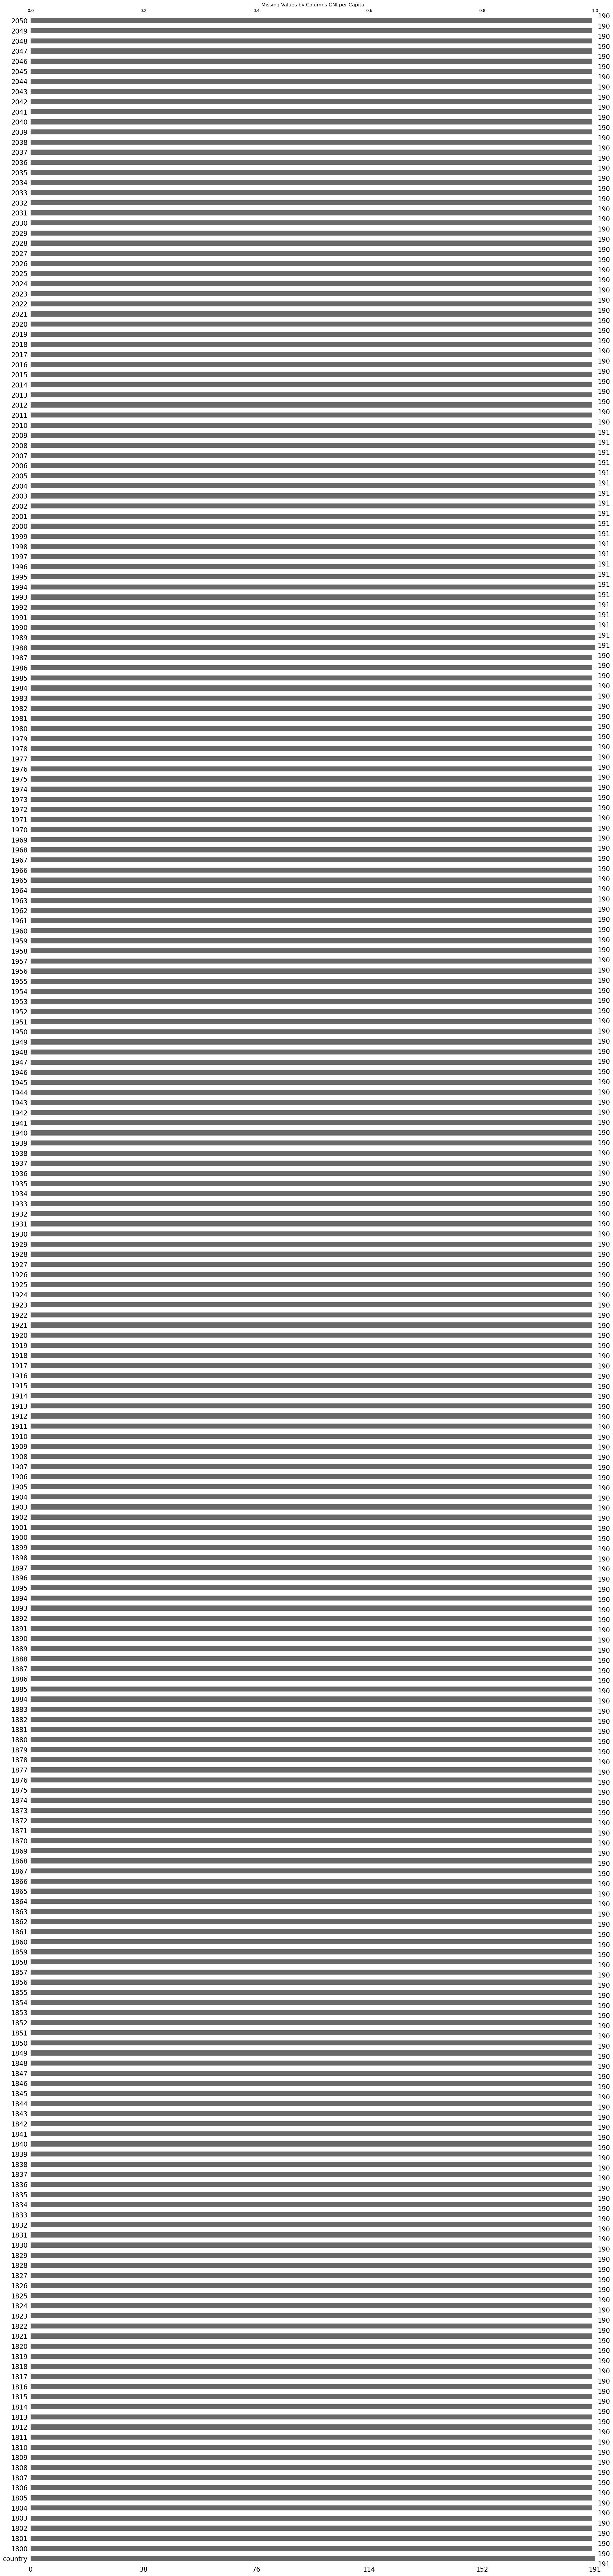

In [10]:
# Check for missing values gni per capita
msno.bar(gni_per_capita)
plt.title("Missing Values by Columns GNI per Capita");

In [11]:
gni_per_capita.shape

(191, 252)

#### GNI per Capita dataset has in total 191 rows of data, and most columns with missing data have only 1 missing values

In [12]:
# Dropping missing values for gni per capita
gni_per_capita.dropna(inplace=True)
gni_per_capita.shape

(190, 252)

In [13]:
# Display data type for gni per capita
gni_per_capita.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046        object
2047        object
2048        object
2049        object
2050        object
Length: 252, dtype: object

#### All data in the GNI per capita dataset are not float, some are object, and It will next be converted next

In [14]:
# Convert data in the proper format for gni per capita
gni_per_capita.loc[:, gni_per_capita.columns != 'country'] = gni_per_capita.loc[:, gni_per_capita.columns != 'country'].map(convert).astype('float64')
gni_per_capita.head(5)

country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
1                Angola  517.0  519.0  522.0  524.0  525.0  528.0  531.0   
2               Albania  207.0  207.0  207.0  207.0  207.0  207.0  207.0   
3  United Arab Emirates  738.0  740.0  743.0  746.0  749.0  751.0  754.0   
4             Argentina  794.0  797.0  799.0  802.0  805.0  808.0  810.0   

    1807   1808  ...     2041     2042     2043     2044     2045     2046  \
0  207.0  207.0  ...    751.0    767.0    783.0    800.0    817.0    834.0   
1  533.0  536.0  ...   2770.0   2830.0   2890.0   2950.0   3010.0   3080.0   
2  207.0  207.0  ...   9610.0   9820.0  10000.0  10200.0  10500.0  10700.0   
3  757.0  760.0  ...  47900.0  48900.0  50000.0  51000.0  52100.0  53200.0   
4  813.0  816.0  ...  12800.0  13100.0  13400.0  13600.0  13900.0  14200.0   

      2047     2048     2049     2050  
0    852.0    870.0    888.0    907.0  
1   3140.0   3210.0   3280.0   3340.0  
2  10900.0  11100.0  11400.0  11600.0  
3  54300.0  55500.0  56700.0  57900.0  
4  14500.0  14800.0  15200.0  15500.0  

[5 rows x 252 columns]

In [15]:
def non_numeric_check(df):
    '''
    This function checks extract non-numeric values from each colum of the data, excluding the 'country' column
    An empty dictionary is returned if all values are numeric
    '''
    result_dict = {}
    for column in df.columns:
        if column == 'country':
            continue
        result_dict[column] = [value for value in df[column] if type(value) not in [float, int, np.float64]]
        if len(result_dict[column]) == 0:
            del result_dict[column]
    return result_dict

non_numeric_check(gni_per_capita) # checking if there is non-numeric values in the gni_per_capita dataframe

{}

In [16]:
gni_per_capita.columns = gni_per_capita.columns.str.lower() # Make sure column name is lowercase

In [17]:
gni_per_capita.loc[:, '1940'][180] # Verify if one sample value converted to number

14800.0

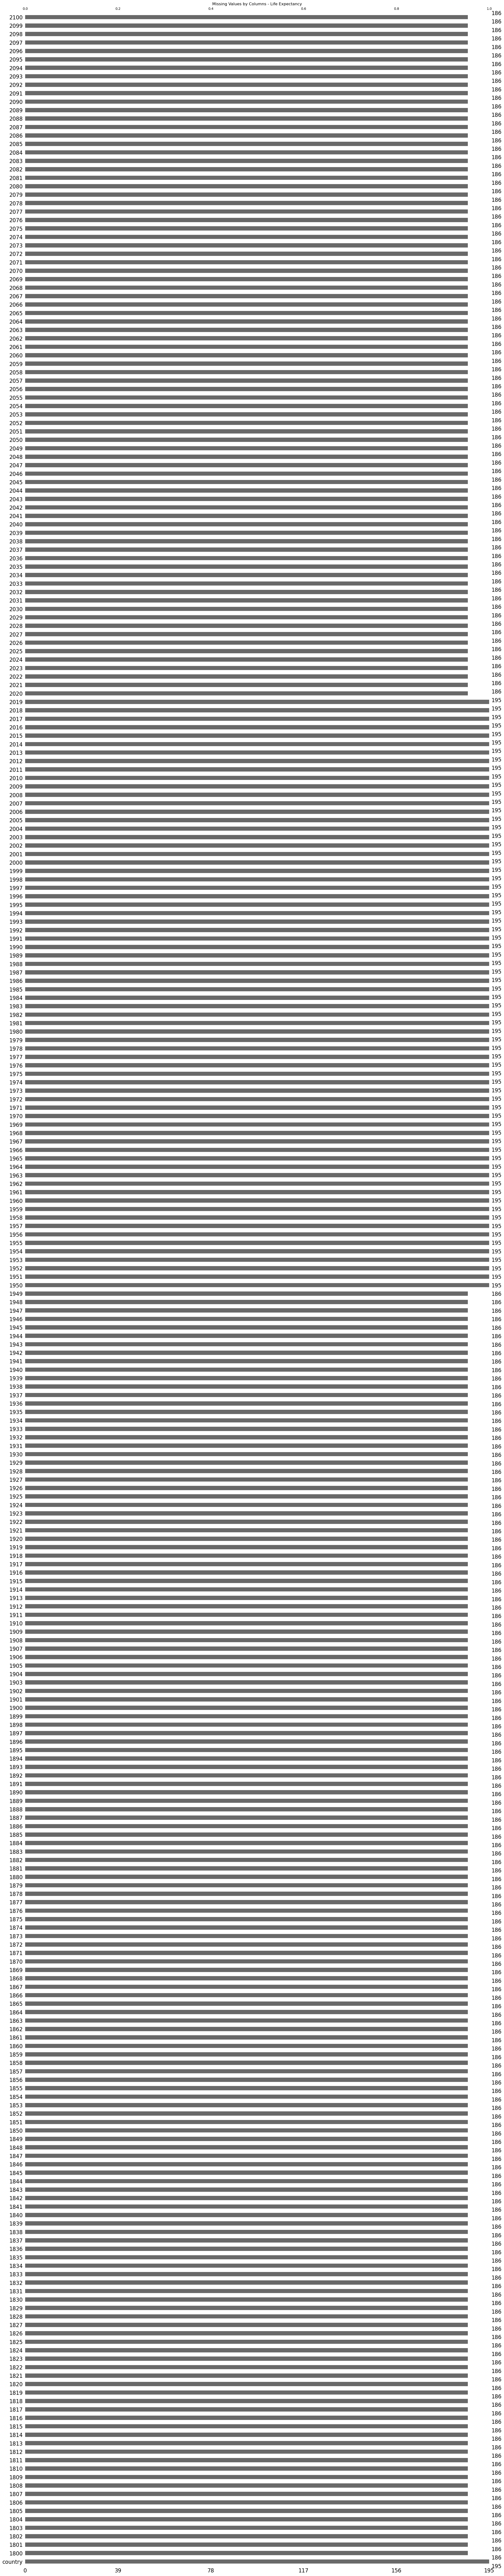

In [18]:
# Check for missing values - life expectancy
msno.bar(life_expectancy)
plt.title("Missing Values by Columns - Life Expectancy");

In [19]:
life_expectancy.shape

(195, 302)

In [20]:
# Dropping missing values for life expectancy
life_expectancy.dropna(inplace=True)
life_expectancy.shape

(186, 302)

In [21]:
# Display data type of life expectancy dataset
life_expectancy.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

#### Life Expectancy dataset has in total 195 rows of data, and most columns with the most missing data have 9 missing values

In [22]:
life_expectancy.columns = life_expectancy.columns.str.lower() # Make sure column name is lowercase for life_expectancy

In [23]:
non_numeric_check(life_expectancy) # checking if there is non-numeric values in the life_expectancy dataframe

{}

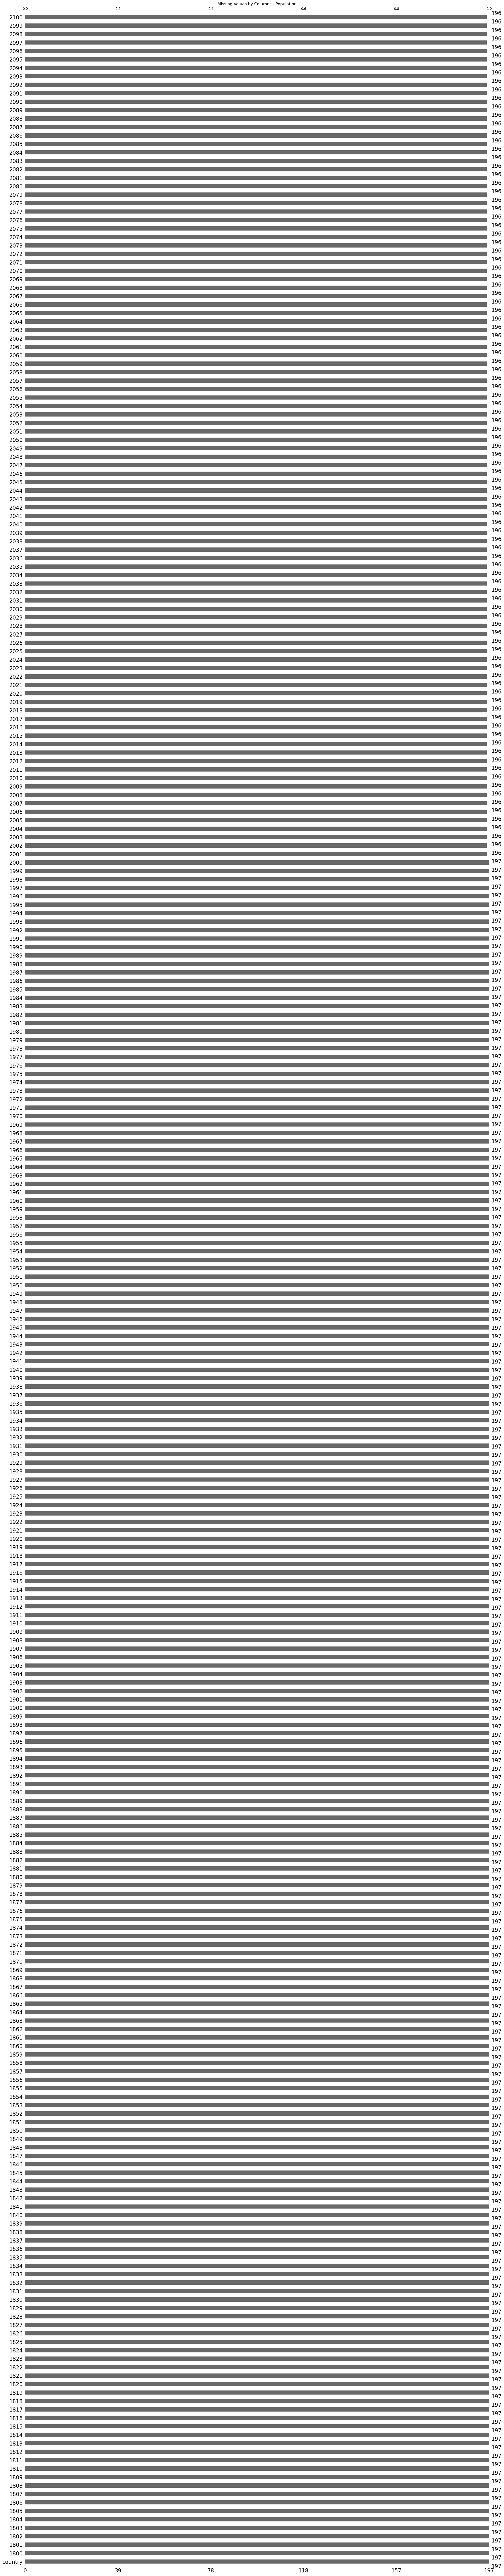

In [24]:
# Checking for missing values for population dataset
msno.bar(population)
plt.title("Missing Values by Columns - Population");

In [25]:
population.shape

(197, 302)

In [26]:
# Dropping missing values for population
population.dropna(inplace=True)
population.shape
#Population dataset has in total 197 rows of data, and most columns with missing data have only 1 missing values

(196, 302)

In [27]:
# Display data type of the population dataframe
population.dtypes

country    object
1800       object
1801       object
1802       object
1803       object
            ...  
2096       object
2097       object
2098       object
2099       object
2100       object
Length: 302, dtype: object

In [28]:
# Convert data in the proper format - number
population.loc[:, population.columns != 'country'] = population.loc[:, population.columns != 'country'].map(convert).astype('float64')
population.head()

country       1800       1801       1802       1803  \
0           Afghanistan  3280000.0  3280000.0  3280000.0  3280000.0   
1                Angola  1570000.0  1570000.0  1570000.0  1570000.0   
2               Albania   400000.0   402000.0   404000.0   405000.0   
3               Andorra     2650.0     2650.0     2650.0     2650.0   
4  United Arab Emirates    40200.0    40200.0    40200.0    40200.0   

        1804       1805       1806       1807       1808  ...         2091  \
0  3280000.0  3280000.0  3280000.0  3280000.0  3280000.0  ...  108000000.0   
1  1570000.0  1570000.0  1570000.0  1570000.0  1570000.0  ...  125000000.0   
2   407000.0   409000.0   411000.0   413000.0   414000.0  ...    1350000.0   
3     2650.0     2650.0     2650.0     2650.0     2650.0  ...      62500.0   
4    40200.0    40200.0    40200.0    40200.0    40200.0  ...   13500000.0   

          2092         2093         2094         2095         2096  \
0  108000000.0  109000000.0  109000000.0  109000000.0  110000000.0   
1  126000000.0  127000000.0  128000000.0  129000000.0  130000000.0   
2    1320000.0    1290000.0    1260000.0    1230000.0    1210000.0   
3      62200.0      61900.0      61700.0      61400.0      61200.0   
4   13500000.0   13600000.0   13700000.0   13800000.0   13800000.0   

          2097         2098         2099         2100  
0  110000000.0  110000000.0  111000000.0  111000000.0  
1  131000000.0  131000000.0  132000000.0  133000000.0  
2    1180000.0    1150000.0    1120000.0    1100000.0  
3      60900.0      60700.0      60500.0      60200.0  
4   13900000.0   14000000.0   14000000.0   14100000.0  

[5 rows x 302 columns]

In [29]:
population.columns = population.columns.str.lower() # Make sure column name is lowercase for population

In [30]:
non_numeric_check(population) # checking if there is non-numeric values in the population dataframe

{}

In [31]:
# columns to merge: from 1900 to 2023
years_range = [str(year) for year in range(1900, 2024)]

# Merge datasets based on country and year
merged_df = pd.merge(population[['country'] + years_range], life_expectancy[['country'] + years_range], on="country", suffixes=('_pop', '_life_exp'))
merged_df = pd.merge(merged_df, gni_per_capita[['country'] + years_range], on="country")

# pd.set_option('display.max_columns', None)  # Display all columns, Referrence: https://builtin.com/data-science/pandas-show-all-columns
merged_df.head()

country   1900_pop   1901_pop   1902_pop   1903_pop  \
0           Afghanistan  4710000.0  4750000.0  4800000.0  4860000.0   
1                Angola  3100000.0  3080000.0  3060000.0  3040000.0   
2               Albania   806000.0   814000.0   821000.0   828000.0   
3  United Arab Emirates    48900.0    49200.0    49600.0    49900.0   
4             Argentina  4690000.0  4860000.0  5040000.0  5230000.0   

    1904_pop   1905_pop   1906_pop   1907_pop   1908_pop  ...     2014  \
0  4920000.0  4980000.0  5040000.0  5110000.0  5170000.0  ...    695.0   
1  3020000.0  3000000.0  2980000.0  2960000.0  2940000.0  ...   5530.0   
2   836000.0   844000.0   851000.0   859000.0   867000.0  ...   5010.0   
3    50200.0    50500.0    50800.0    51200.0    51500.0  ...  49000.0   
4  5430000.0  5640000.0  5850000.0  6080000.0  6310000.0  ...  13600.0   

      2015     2016     2017     2018     2019     2020     2021     2022  \
0    655.0    611.0    578.0    531.0    530.0    500.0    508.0    519.0   
1   5020.0   4190.0   3760.0   3340.0   3030.0   2140.0   2090.0   2070.0   
2   4880.0   4800.0   4680.0   5060.0   5330.0   5210.0   5480.0   5710.0   
3  47600.0  45100.0  42800.0  43200.0  44700.0  39400.0  39400.0  39200.0   
4  14000.0  13600.0  14300.0  12900.0  11500.0   9070.0   9500.0   9640.0   

      2023  
0    531.0  
1   2080.0  
2   5950.0  
3  39100.0  
4   9750.0  

[5 rows x 373 columns]

In [32]:
merged_df.shape

(184, 373)

In [33]:
merged_df.head()

country   1900_pop   1901_pop   1902_pop   1903_pop  \
0           Afghanistan  4710000.0  4750000.0  4800000.0  4860000.0   
1                Angola  3100000.0  3080000.0  3060000.0  3040000.0   
2               Albania   806000.0   814000.0   821000.0   828000.0   
3  United Arab Emirates    48900.0    49200.0    49600.0    49900.0   
4             Argentina  4690000.0  4860000.0  5040000.0  5230000.0   

    1904_pop   1905_pop   1906_pop   1907_pop   1908_pop  ...     2014  \
0  4920000.0  4980000.0  5040000.0  5110000.0  5170000.0  ...    695.0   
1  3020000.0  3000000.0  2980000.0  2960000.0  2940000.0  ...   5530.0   
2   836000.0   844000.0   851000.0   859000.0   867000.0  ...   5010.0   
3    50200.0    50500.0    50800.0    51200.0    51500.0  ...  49000.0   
4  5430000.0  5640000.0  5850000.0  6080000.0  6310000.0  ...  13600.0   

      2015     2016     2017     2018     2019     2020     2021     2022  \
0    655.0    611.0    578.0    531.0    530.0    500.0    508.0    519.0   
1   5020.0   4190.0   3760.0   3340.0   3030.0   2140.0   2090.0   2070.0   
2   4880.0   4800.0   4680.0   5060.0   5330.0   5210.0   5480.0   5710.0   
3  47600.0  45100.0  42800.0  43200.0  44700.0  39400.0  39400.0  39200.0   
4  14000.0  13600.0  14300.0  12900.0  11500.0   9070.0   9500.0   9640.0   

      2023  
0    531.0  
1   2080.0  
2   5950.0  
3  39100.0  
4   9750.0  

[5 rows x 373 columns]

In [34]:
merged_df.dtypes

country     object
1900_pop    object
1901_pop    object
1902_pop    object
1903_pop    object
             ...  
2019        object
2020        object
2021        object
2022        object
2023        object
Length: 373, dtype: object

Even though the previous function **non_numeric_check** allowed to check that there are only data numeric, `merged_df.describe()` did not provide all summary statistics for each columns excluding `"country"`.

The following function **convert_df_to_numeric** is for making sure that all the data are converted to numeric. In the next section `merged_df.describe()` did not provide all summary of central tendency for all columns excluding `"country"` column, and the following function is fixing this issue

In [35]:
# Ref.: https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results
def convert_df_to_numeric(df):
    """
    This function convert all columns to numeric type exluding column 'country'
    """
    for column in df.columns[1:]:  # Exclude the first column 'country'
        df[column] = pd.to_numeric(df[column])
    return df

merged_df = convert_df_to_numeric(merged_df)

In [36]:
merged_df.dtypes

country      object
1900_pop    float64
1901_pop    float64
1902_pop    float64
1903_pop    float64
             ...   
2019        float64
2020        float64
2021        float64
2022        float64
2023        float64
Length: 373, dtype: object

In [37]:
# Save cleaned and merged dataframes as csv files
merged_df.to_csv("merged_pop_lifeExp_gni.csv")

In [38]:
# def type_check(df):
#     '''
#     This function extracts data types found in each column for each data in the column, excluding the 'country' column
#     '''
#     result_dict = {}
#     for column in df.columns:
#         if column == 'country':
#             continue
#         types_list = []
#         for value in df[column]:
#             value_type = type(value)
#             if value_type not in types_list:
#                 types_list.append(value_type)
#         if types_list:
#             result_dict[column] = types_list
#     return result_dict

# # Example usage:
# type_check(merged_df)

### Data Dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|country|object|gni_per_cap_atlas_method_con2021.csv, life_expectancy.csv, and population.csv|Name of the country|
|1900-2023_pop|int|merged_data.csv|Population of the country for each year (1900-2023)| 
|1900-2023_life_exp|float|merged_data.csv|Life expectancy of the country for each year (1900-2023)| 
|1900-2023|float|merged_data.csv|GNI per capita of the country for each year (1900-2023)| 


## Exploratory Data Analysis

In [39]:
# 1. summary statistics
merged_df.describe()

1900_pop      1901_pop      1902_pop      1903_pop      1904_pop  \
count  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02   
mean   8.793348e+06  8.861077e+06  8.928840e+06  9.004520e+06  9.077650e+06   
std    3.681365e+07  3.700258e+07  3.719147e+07  3.742239e+07  3.761447e+07   
min    1.610000e+04  1.610000e+04  1.620000e+04  1.630000e+04  1.640000e+04   
25%    3.260000e+05  3.300000e+05  3.340000e+05  3.440000e+05  3.542500e+05   
50%    1.615000e+06  1.610000e+06  1.600000e+06  1.590000e+06  1.580000e+06   
75%    4.682500e+06  4.742500e+06  4.805000e+06  4.867500e+06  4.890000e+06   
max    3.960000e+08  3.980000e+08  4.000000e+08  4.020000e+08  4.040000e+08   

           1905_pop      1906_pop      1907_pop      1908_pop      1909_pop  \
count  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02   
mean   9.160228e+06  9.239104e+06  9.313832e+06  9.393967e+06  9.470787e+06   
std    3.790449e+07  3.813724e+07  3.833119e+07  3.856625e+07  3.881504e+07   
min    1.650000e+04  1.650000e+04  1.660000e+04  1.670000e+04  1.680000e+04   
25%    3.530000e+05  3.582500e+05  3.625000e+05  3.687500e+05  3.752500e+05   
50%    1.580000e+06  1.600000e+06  1.620000e+06  1.635000e+06  1.660000e+06   
75%    4.890000e+06  4.890000e+06  4.892500e+06  4.892500e+06  4.942500e+06   
max    4.070000e+08  4.090000e+08  4.110000e+08  4.130000e+08  4.160000e+08   

       ...           2014           2015          2016          2017  \
count  ...     184.000000     184.000000    184.000000    184.000000   
mean   ...   15170.277174   14552.070652  13932.163043  13543.364130   
std    ...   21332.603903   20138.209592  19194.152005  18562.747955   
min    ...     287.000000     289.000000    289.000000    283.000000   
25%    ...    1987.500000    1980.000000   1925.000000   1932.500000   
50%    ...    6255.000000    5930.000000   5630.000000   5485.000000   
75%    ...   16600.000000   15975.000000  15650.000000  15600.000000   
max    ...  115000.000000  103000.000000  93800.000000  89200.000000   

               2018          2019          2020          2021          2022  \
count    184.000000    184.000000    184.000000    184.000000    184.000000   
mean   13803.456522  14004.864130  12981.233696  13398.728261  13812.722826   
std    18863.163423  19019.452813  18001.061893  18546.163905  19039.322006   
min      260.000000    245.000000    230.000000    230.000000    231.000000   
25%     1937.500000   1962.500000   1902.500000   1915.000000   1967.500000   
50%     5490.000000   5485.000000   4785.000000   4880.000000   5070.000000   
75%    16425.000000  16725.000000  14675.000000  15400.000000  16200.000000   
max    86700.000000  85900.000000  82600.000000  84500.000000  85800.000000   

               2023  
count    184.000000  
mean   14090.706522  
std    19310.695969  
min      233.000000  
25%     1975.000000  
50%     5155.000000  
75%    16775.000000  
max    86000.000000  

[8 rows x 372 columns]

In [40]:
# dictionary comprehension to apply the standard deviation function created to each numeric column
numeric_columns = [col for col in merged_df.select_dtypes("number")]

# Calculate standard deviation for life expectancy columns
st_dev = {col: standard_deviation(merged_df[col]) for col in numeric_columns}

st_dev

{'1900_pop': 36713473.18097413,
 '1901_pop': 36901888.94087384,
 '1902_pop': 37090270.6473928,
 '1903_pop': 37320559.040196605,
 '1904_pop': 37512113.13411334,
 '1905_pop': 37801345.491267316,
 '1906_pop': 38033468.61690053,
 '1907_pop': 38226887.73531188,
 '1908_pop': 38461305.79825791,
 '1909_pop': 38709418.16028873,
 '1910_pop': 38956761.83640889,
 '1911_pop': 39255550.513169765,
 '1912_pop': 39551854.95951873,
 '1913_pop': 39806524.54958097,
 '1914_pop': 40119746.271231346,
 '1915_pop': 40475583.89143214,
 '1916_pop': 40790862.56164962,
 '1917_pop': 41051378.393836774,
 '1918_pop': 41371331.275018305,
 '1919_pop': 41726859.40494971,
 '1920_pop': 42017822.55426326,
 '1921_pop': 42297640.283523865,
 '1922_pop': 42592173.85544903,
 '1923_pop': 42809676.28034411,
 '1924_pop': 43073199.66830186,
 '1925_pop': 43350585.536561124,
 '1926_pop': 43558061.797297895,
 '1927_pop': 43837242.02560052,
 '1928_pop': 44116349.93608552,
 '1929_pop': 44383970.425819166,
 '1930_pop': 44704770.5650386,


### Investigate trends in the data

In [41]:
# Sorting by population in 2023
top_pop_2023 = merged_df.sort_values(by='2023_pop', ascending=False).head()
print("Top population in 2023")
print(top_pop_2023[['country', '2023_pop']]), print("")

# Sorting by GNI per capita in 2023
top_gni_2023 = merged_df.sort_values(by='2023', ascending=False).head()
print("Top GNI per capita in 2023:")
print(top_gni_2023[['country', '2023']]), print("")

# Sorting by Life expectancy in 2023
top_lifeExp_2023 = merged_df.sort_values(by='2023_life_exp', ascending=False).head()
print("Top Life expectancy in 2023")
print(top_lifeExp_2023[['country', '2023']])

Top population in 2023
           country      2023_pop
76           India  1.430000e+09
31           China  1.430000e+09
173  United States  3.400000e+08
75       Indonesia  2.780000e+08
128       Pakistan  2.400000e+08

Top GNI per capita in 2023:
           country     2023
29     Switzerland  86000.0
124         Norway  85400.0
101     Luxembourg  84900.0
77         Ireland  72300.0
173  United States  70900.0

Top Life expectancy in 2023
              country     2023
144         Singapore  59200.0
85              Japan  43700.0
70   Hong Kong, China  53200.0
80            Iceland  65500.0
29        Switzerland  86000.0


#### Which states have the highest and lowest population between 2003 and 2023?

In [42]:
population_columns = merged_df.columns[104:125] # population columns from 2003 to 2023

highest_population = merged_df[population_columns].max() # highest population and country for each year from 2013 to 2023
highest_idx_country = merged_df[population_columns].idxmax()

lowest_population = merged_df[population_columns].min() # lowest population and country for each year from 2013 to 2023
lowest_idx_country = merged_df[population_columns].idxmin()

# Create dataframes to display the results
highest_population_data = pd.DataFrame({'Year': [year.replace('_pop', '') for year in highest_population.index], 'Country': merged_df['country'].loc[highest_idx_country.values], 'Population': highest_population.values})
lowest_population_data = pd.DataFrame({'Year': [year.replace('_pop', '') for year in highest_population.index], 'Country': merged_df['country'].loc[lowest_idx_country.values], 'Population': lowest_population.values})

# Print the countries with the highest and lowest populations for the past few decades
print("Countries with highest population between 2003 and 2023:")
print(highest_population_data)

print("\nCountries with lowest population between 2003 and 2023:")
print(lowest_population_data)

Countries with highest population between 2003 and 2023:
    Year Country    Population
31  2003   China  1.290000e+09
31  2004   China  1.300000e+09
31  2005   China  1.300000e+09
31  2006   China  1.310000e+09
31  2007   China  1.320000e+09
31  2008   China  1.330000e+09
31  2009   China  1.340000e+09
31  2010   China  1.350000e+09
31  2011   China  1.360000e+09
31  2012   China  1.370000e+09
31  2013   China  1.380000e+09
31  2014   China  1.390000e+09
31  2015   China  1.390000e+09
31  2016   China  1.400000e+09
31  2017   China  1.410000e+09
31  2018   China  1.420000e+09
31  2019   China  1.420000e+09
31  2020   China  1.420000e+09
31  2021   China  1.430000e+09
31  2022   China  1.430000e+09
31  2023   China  1.430000e+09

Countries with lowest population between 2003 and 2023:
   Year              Country  Population
6  2003  Antigua and Barbuda     78100.0
6  2004  Antigua and Barbuda     78900.0
6  2005  Antigua and Barbuda     79900.0
6  2006  Antigua and Barbuda     80900.0

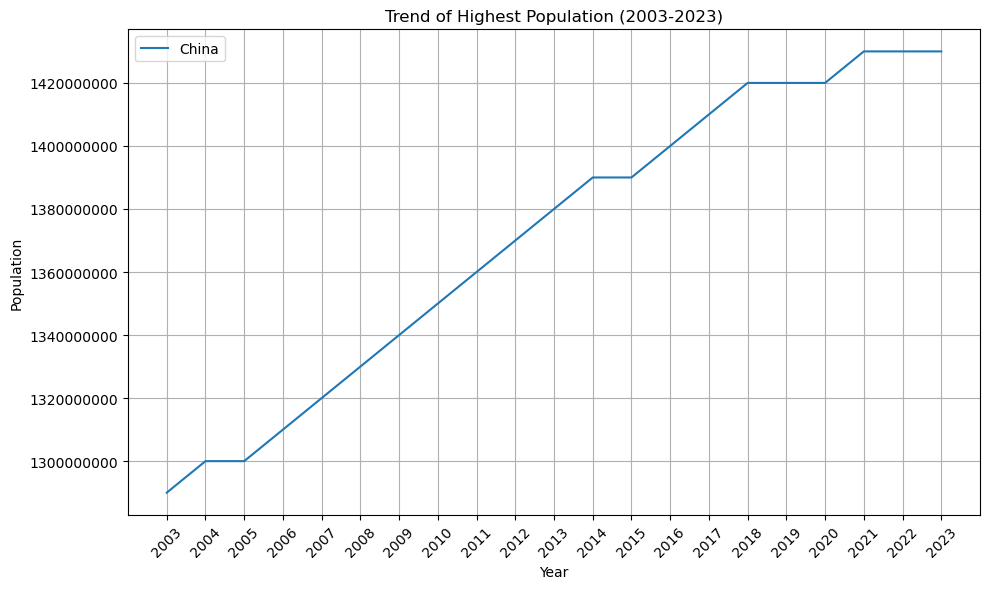

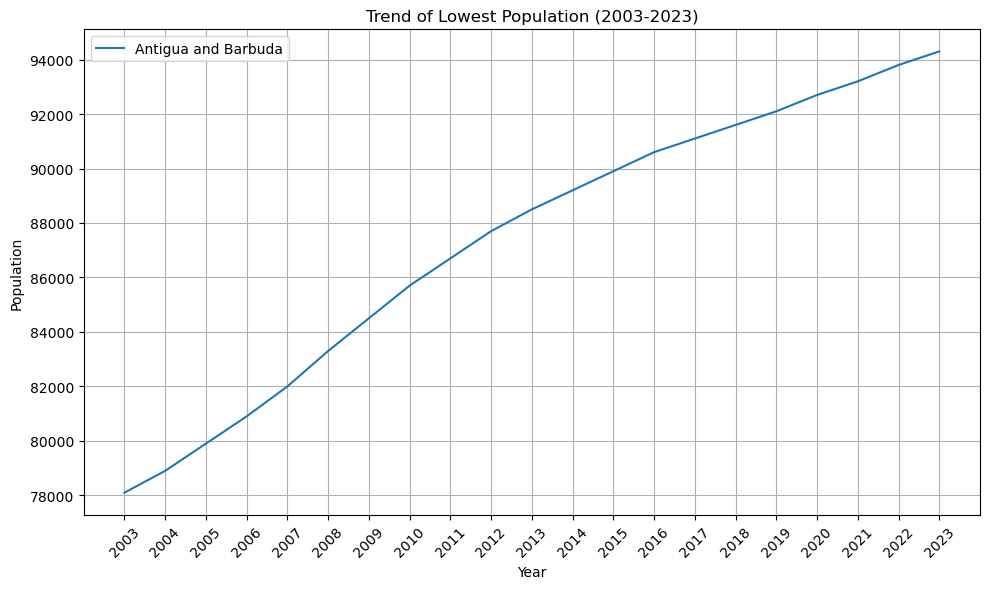

In [43]:
# Plot for highest population trend
plt.figure(figsize=(10, 6))
for country in highest_population_data['Country'].unique():
    country_data = highest_population_data[highest_population_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Population'], label=country)

plt.title('Trend of Highest Population (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.ticklabel_format(style='plain', axis='y') # update format of y-axis from scientific to plain
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for lowest population trend
plt.figure(figsize=(10, 6))
for country in lowest_population_data['Country'].unique():
    country_data = lowest_population_data[lowest_population_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Population'], label=country)

plt.title('Trend of Lowest Population (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**From the calculation above, it can be conclude that China, and Antigua and Barbuda are respectively the countries with the highest and lowest population**

#### Which states have the highest and lowest life expectancy between 2003 and 2023?

In [44]:
life_expectancy_columns = merged_df.columns[228:249] # life expectancy columns from 2003 to 2023

highest_life_expectancy = merged_df[life_expectancy_columns].max() # highest life expectancy and country for each year from 2003 to 2023
highest_idx_life_exp = merged_df[life_expectancy_columns].idxmax()

lowest_life_expectancy = merged_df[life_expectancy_columns].min() # lowest life expectancy and country for each year from 2003 to 2023
lowest_idx_life_exp = merged_df[life_expectancy_columns].idxmin()

# dataframes to display the results
highest_life_expectancy_data = pd.DataFrame({'Year': [year.replace('_life_exp', '') for year in highest_life_expectancy.index], 'Country': merged_df['country'].loc[highest_idx_life_exp.values], 'Life Expectancy': highest_life_expectancy.values})
lowest_life_expectancy_data = pd.DataFrame({'Year': [year.replace('_life_exp', '')for year in highest_life_expectancy.index], 'Country': merged_df['country'].loc[lowest_idx_life_exp.values], 'Life Expectancy': lowest_life_expectancy.values})

# Print the countries with the highest and lowest life expectancys for the past few decades
print("Countries with highest life expectancy between 2003 and 2023:")
print(highest_life_expectancy_data)

print("\nCountries with lowest life expectancy between 2003 and 2023:")
print(lowest_life_expectancy_data)

Countries with highest life expectancy between 2003 and 2023:
     Year    Country  Life Expectancy
85   2003      Japan             82.3
85   2004      Japan             82.5
85   2005      Japan             82.5
85   2006      Japan             82.8
85   2007      Japan             82.9
85   2008      Japan             83.1
85   2009      Japan             83.3
85   2010      Japan             83.3
85   2011      Japan             83.2
85   2012      Japan             83.6
85   2013      Japan             83.9
85   2014      Japan             84.1
85   2015      Japan             84.3
85   2016      Japan             84.5
85   2017      Japan             84.7
85   2018      Japan             84.8
85   2019      Japan             84.8
144  2020  Singapore             84.9
85   2021      Japan             85.1
144  2022  Singapore             85.3
144  2023  Singapore             85.4

Countries with lowest life expectancy between 2003 and 2023:
     Year                   Country  Lif

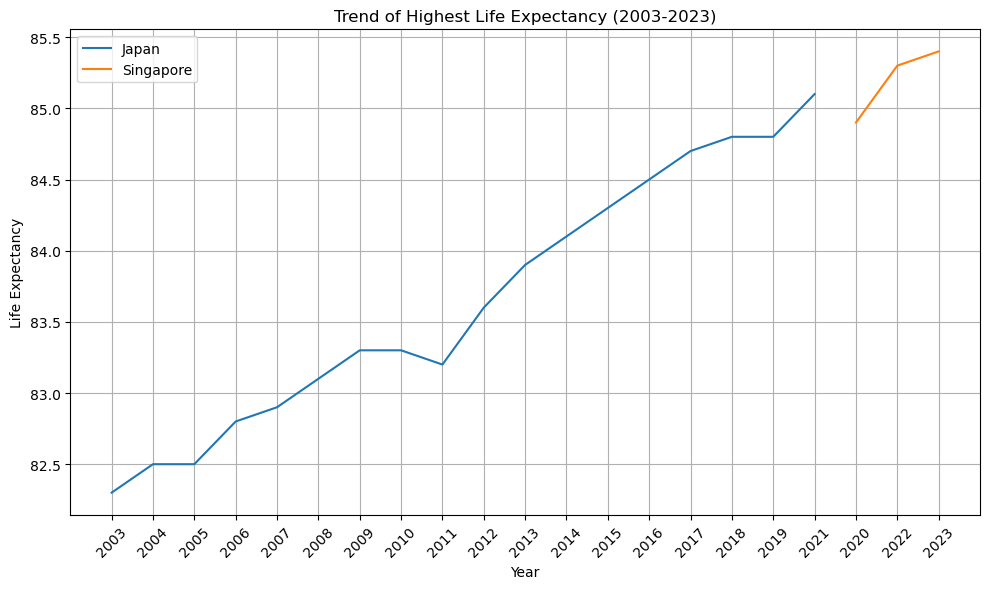

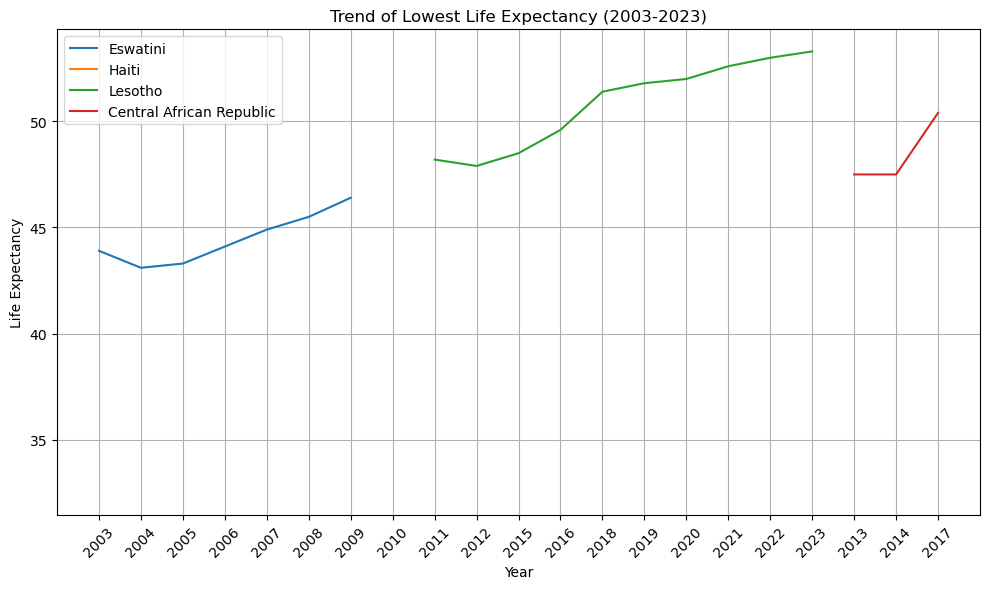

In [45]:
# Plot for highest Life Expectancy trend
plt.figure(figsize=(10, 6))
for country in highest_life_expectancy_data['Country'].unique():
    country_data = highest_life_expectancy_data[highest_life_expectancy_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life Expectancy'], label=country)

plt.title('Trend of Highest Life Expectancy (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.ticklabel_format(style='plain', axis='y') # update format of y-axis from scientific to plain
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for lowest Life Expectancy trend
plt.figure(figsize=(10, 6))
for country in lowest_life_expectancy_data['Country'].unique():
    country_data = lowest_life_expectancy_data[lowest_life_expectancy_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life Expectancy'], label=country)

plt.title('Trend of Lowest Life Expectancy (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**From the calculation above, it can be conclude that Japan and Singapore are the countries with highest life expectancy in the last two decade, and Eswatini, Haiti, Lesotho, Central African Republic are the countries with lowest life expectancy in the last two decades**

#### Which states have the highest and lowest GNI per Capita between 2003 and 2023?

In [46]:
gni_per_capita_columns = merged_df.columns[352:373] # gni per capita columns from 2003 to 2023

highest_gni_per_capita = merged_df[gni_per_capita_columns].max() # highest gni per capita and country for each year from 2003 to 2023
highest_idx_gni_per_cap = merged_df[gni_per_capita_columns].idxmax()

lowest_gni_per_capita = merged_df[gni_per_capita_columns].min() # lowest gni per capita and country for each year from 2003 to 2023
lowest_idx_gni_per_cap = merged_df[gni_per_capita_columns].idxmin()

# Create dataframes to display the results
highest_gni_per_capita_data = pd.DataFrame({'Year': [year for year in highest_gni_per_capita.index], 'Country': merged_df['country'].loc[highest_idx_gni_per_cap.values], 'Gni per capita': highest_gni_per_capita.values})
lowest_gni_per_capita_data = pd.DataFrame({'Year': [year for year in highest_gni_per_capita.index], 'Country': merged_df['country'].loc[lowest_idx_gni_per_cap.values], 'Gni per capita': lowest_gni_per_capita.values})

# Print the countries with the highest and lowest gni per capitas for the past few decades
print("Countries with highest GNI per capita between 2003 and 2023:")
print(highest_gni_per_capita_data)

print("\nCountries with lowest GNI per capita between 2003 and 2023:")
print(lowest_gni_per_capita_data)


Countries with highest GNI per capita between 2003 and 2023:
     Year      Country  Gni per capita
29   2003  Switzerland         65200.0
101  2004   Luxembourg         81900.0
101  2005   Luxembourg         92500.0
101  2006   Luxembourg         88800.0
101  2007   Luxembourg        106000.0
124  2008       Norway        106000.0
124  2009       Norway        106000.0
124  2010       Norway        105000.0
124  2011       Norway        105000.0
124  2012       Norway        112000.0
124  2013       Norway        117000.0
124  2014       Norway        115000.0
124  2015       Norway        103000.0
29   2016  Switzerland         93800.0
29   2017  Switzerland         89200.0
29   2018  Switzerland         86700.0
29   2019  Switzerland         85900.0
29   2020  Switzerland         82600.0
29   2021  Switzerland         84500.0
29   2022  Switzerland         85800.0
29   2023  Switzerland         86000.0

Countries with lowest GNI per capita between 2003 and 2023:
    Year   Country  

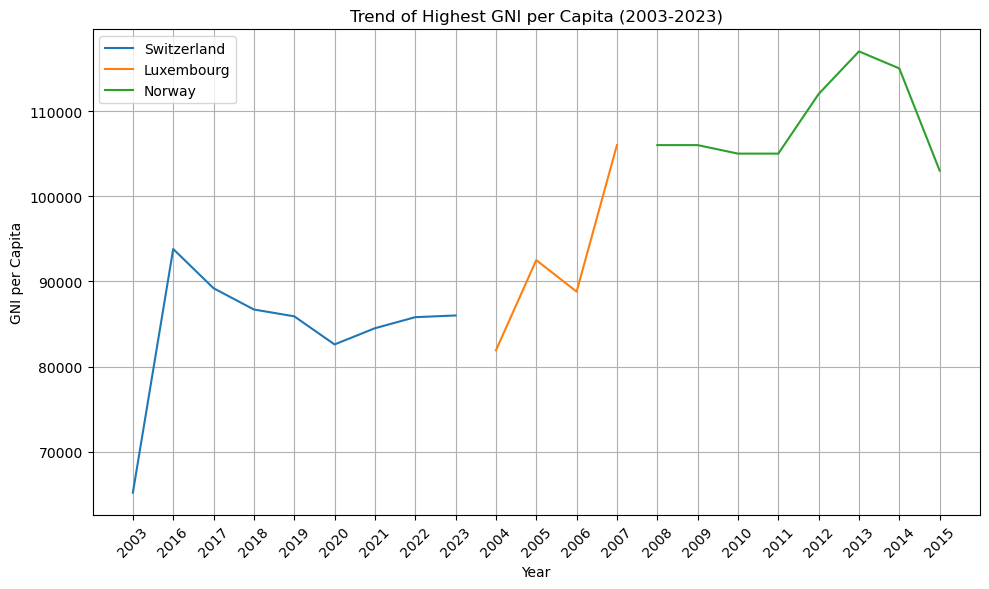

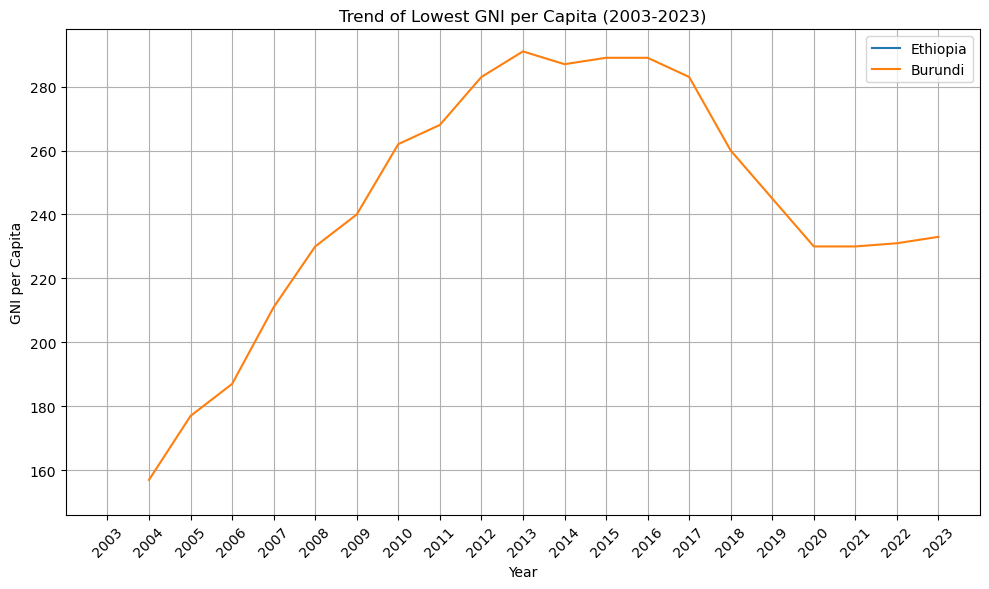

In [47]:
# Plot for highest GNI per Capita trend
plt.figure(figsize=(10, 6))
for country in highest_gni_per_capita_data['Country'].unique():
    country_data_gni = highest_gni_per_capita_data[highest_gni_per_capita_data['Country'] == country]
    plt.plot(country_data_gni['Year'], country_data_gni['Gni per capita'], label=country)

plt.title('Trend of Highest GNI per Capita (2003-2023)')
plt.xlabel('Year')
plt.ylabel('GNI per Capita')
plt.ticklabel_format(style='plain', axis='y') # update format of y-axis from scientific to plain
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for lowest GNI per Capita trend
plt.figure(figsize=(10, 6))
for country in lowest_gni_per_capita_data['Country'].unique():
    country_data_gni = lowest_gni_per_capita_data[lowest_gni_per_capita_data['Country'] == country]
    plt.plot(country_data_gni['Year'], country_data_gni['Gni per capita'], label=country)

plt.title('Trend of Lowest GNI per Capita (2003-2023)')
plt.xlabel('Year')
plt.ylabel('GNI per Capita')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the calculation above, it can be conclude that Norway and Switzerland are the countries with the highest GNI per capita in the last two decade, and Burundi the countries with lowest GNI per capita in the last two decades

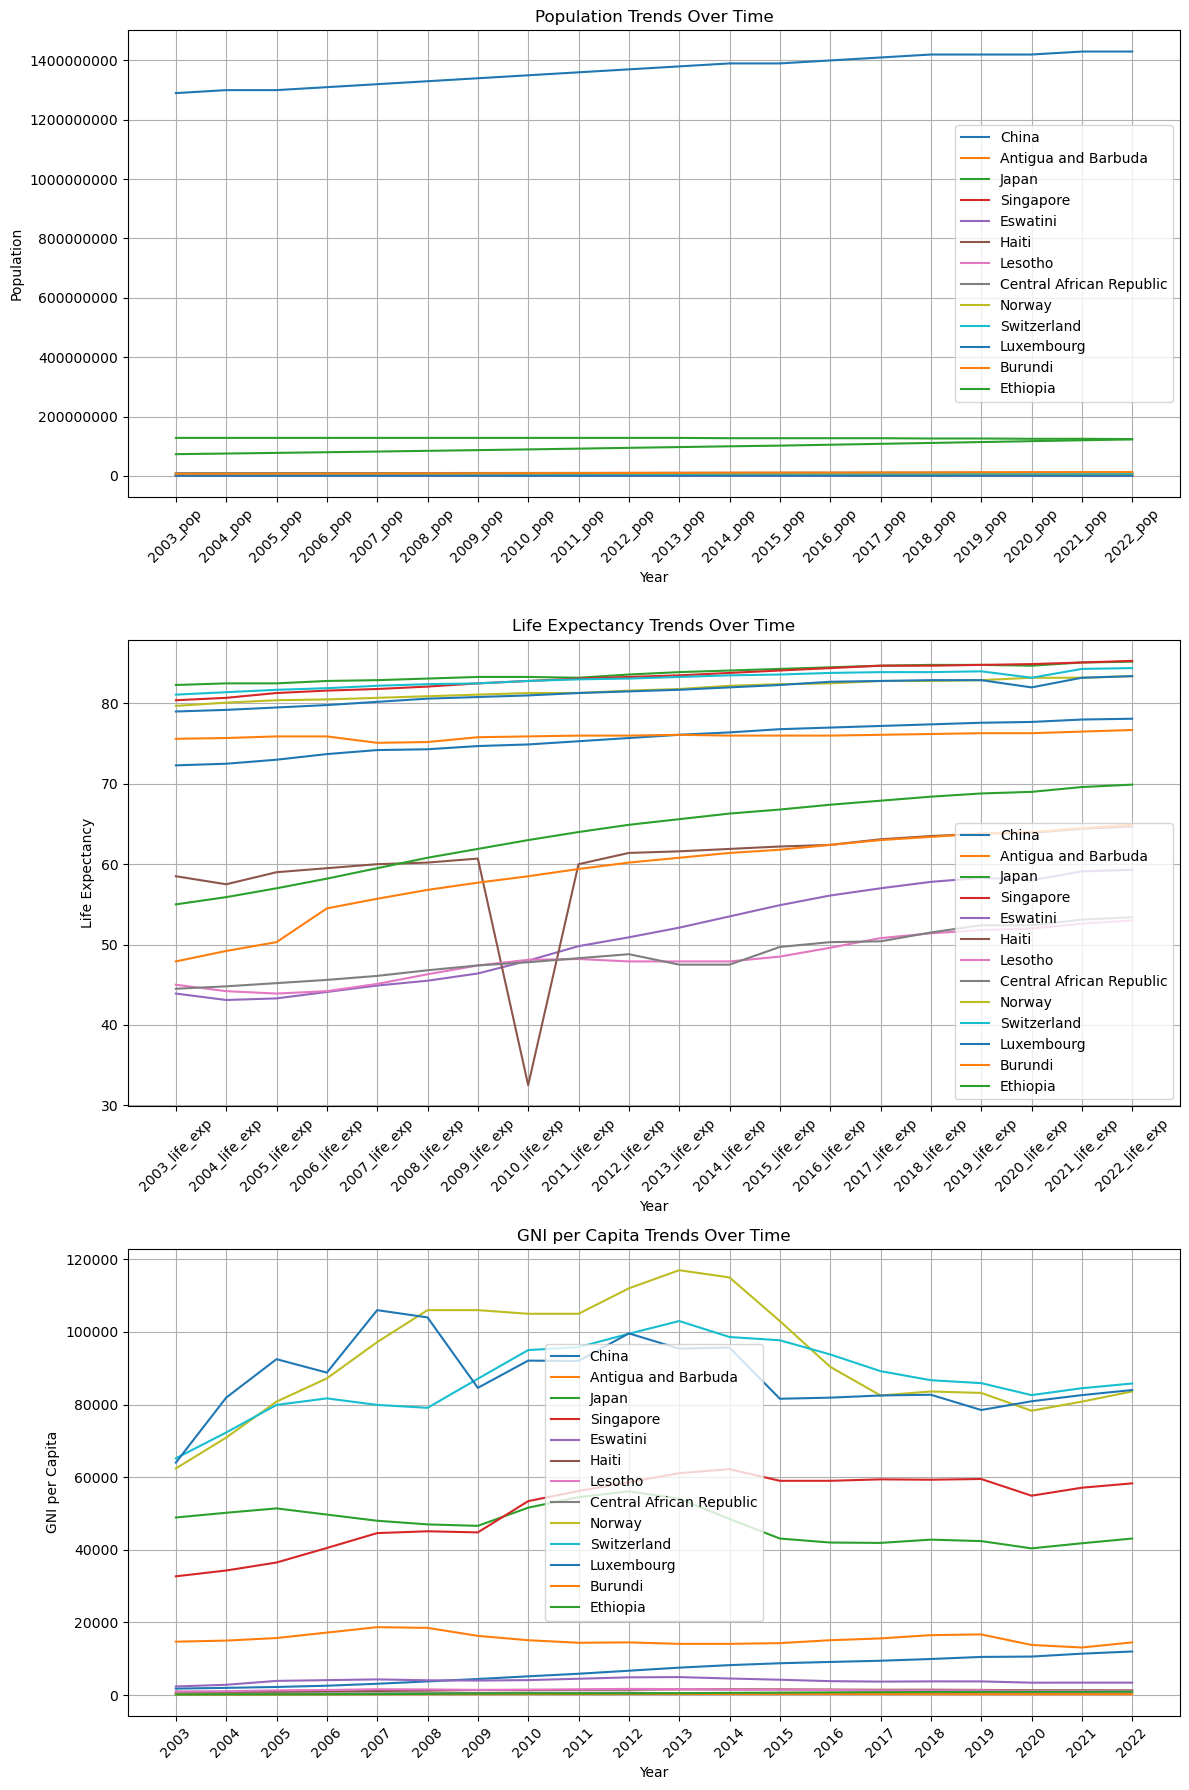

In [48]:
random_countries = ['China', 'Antigua and Barbuda', 'Japan', 'Singapore', 'Eswatini', 'Haiti', 'Lesotho', 'Central African Republic', 'Norway', 'Switzerland', 'Luxembourg', 'Burundi', 'Ethiopia']

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot Population Trends
axs[0].set_title('Population Trends Over Time')
for country in random_countries:
    axs[0].plot(merged_df.columns[104:124], merged_df[merged_df['country'] == country].iloc[:, 104:124].values.flatten(), label=country)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Population')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks
axs[0].ticklabel_format(style='plain', axis='y')
axs[0].legend()
axs[0].grid(True)

# Plot Life Expectancy Trends
axs[1].set_title('Life Expectancy Trends Over Time')
for country in random_countries:
    axs[1].plot(merged_df.columns[228:248], merged_df[merged_df['country'] == country].iloc[:, 228:248].values.flatten(), label=country)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Life Expectancy')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks
axs[1].legend()
axs[1].grid(True)

# Plot GNI per Capita Trends
axs[2].set_title('GNI per Capita Trends Over Time')
for country in random_countries:
    axs[2].plot(merged_df.columns[352:372], merged_df[merged_df['country'] == country].iloc[:, 352:372].values.flatten(), label=country)
axs[2].set_xlabel('Year')
axs[2].set_ylabel('GNI per Capita')
axs[2].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.savefig('combined_plot.png')
plt.show()

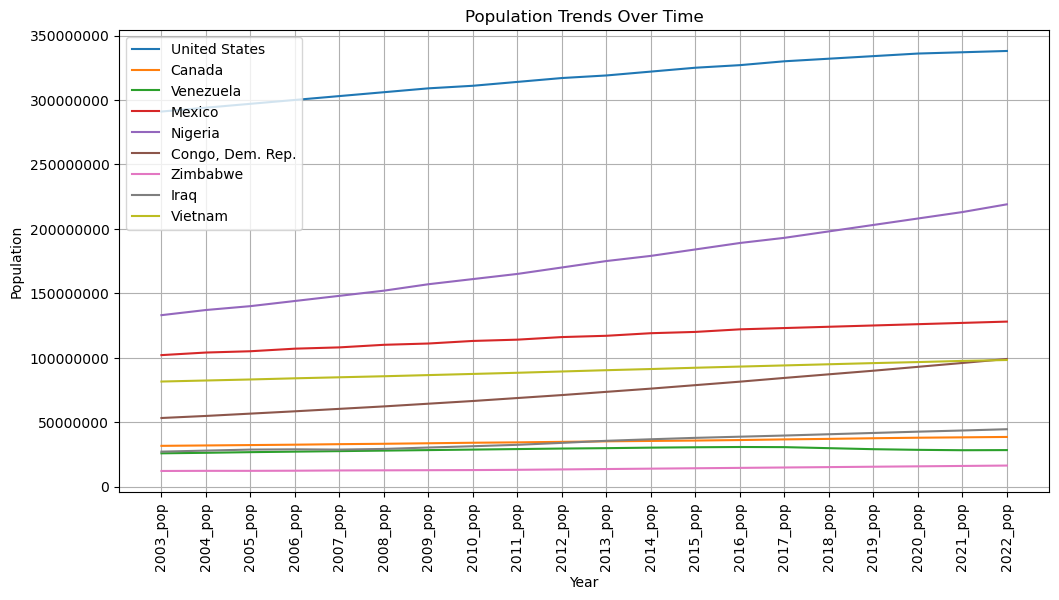

In [49]:
# random_countries = ['China', 'Antigua and Barbuda', 'Japan', 'Singapore', 'Eswatini', 'Haiti', 'Lesoto', 'Central African Republic', 'Norway', 'Switzerland', 'Luxembourg', 'Burundi', 'Ethiopia']
random_countries = ['United States', 'Canada', 'Venezuela', 'Mexico', 'Nigeria', 'Congo, Dem. Rep.', 'Zimbabwe', 'Iraq', 'Vietnam']

plt.figure(figsize=(12, 6))
for country in random_countries:
    plt.plot(merged_df.columns[104:124], merged_df[merged_df['country'] == country].iloc[:, 104:124].values.flatten(), label=country)
plt.title('Population Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90) # display x-axis every 10 years
plt.ticklabel_format(style='plain', axis='y') # update format of y-axis from scientific to plai
plt.legend()
plt.grid(True)
plt.show()

#### Which states have the highest and lowest GNI per growth rate over the last 50 years from 1973 to 2023?

In [50]:
gni_per_capita_initial = merged_df['1973']
gni_per_capita_final = merged_df['2023']

gni_per_capita_growth = ((gni_per_capita_final - gni_per_capita_initial) / gni_per_capita_initial) * 100
gni_per_capita_growth_data = pd.DataFrame({'Country': merged_df['country'], 'GNI per Capita Grow Rate (%)': round(gni_per_capita_growth, 3)})

highest_growth_gni = gni_per_capita_growth_data.nlargest(5, 'GNI per Capita Grow Rate (%)')
lowest_growth_gni = gni_per_capita_growth_data.nsmallest(5, 'GNI per Capita Grow Rate (%)')

print("Countries with the highest GNI per Capita Grow Rate:")
print(highest_growth_gni)

print("\nCountries with the lowest GNI per Capita Grow Rate:")
print(lowest_growth_gni)

Countries with the highest GNI per Capita Grow Rate:
         Country  GNI per Capita Grow Rate (%)
31         China                      2497.938
9     Azerbaijan                      1438.721
106     Maldives                      1137.781
91   South Korea                      1133.677
69        Guyana                       928.133

Countries with the lowest GNI per Capita Grow Rate:
                      Country  GNI per Capita Grow Rate (%)
158                     Syria                       -74.902
176                 Venezuela                       -61.053
78                       Iran                       -60.285
27   Central African Republic                       -52.807
92                     Kuwait                       -50.685


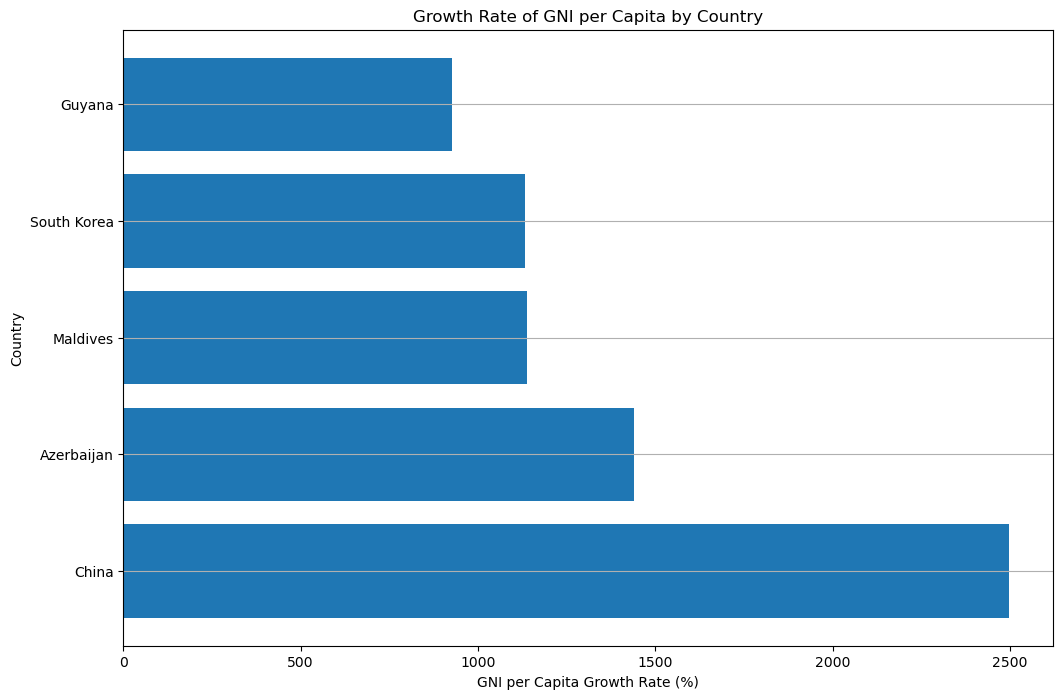

In [51]:
# GNI per Capita Growth Rate
gni_per_capita_growth_data_sorted = gni_per_capita_growth_data.sort_values(by='GNI per Capita Grow Rate (%)', ascending=False).head(5)

# Plotting the data
plt.figure(figsize=(12, 8))
plt.barh(gni_per_capita_growth_data_sorted['Country'], gni_per_capita_growth_data_sorted['GNI per Capita Grow Rate (%)'])
plt.xlabel('GNI per Capita Growth Rate (%)')
plt.ylabel('Country')
plt.title('Growth Rate of GNI per Capita by Country')
plt.grid(axis='x', alpha=0.7)
plt.grid();

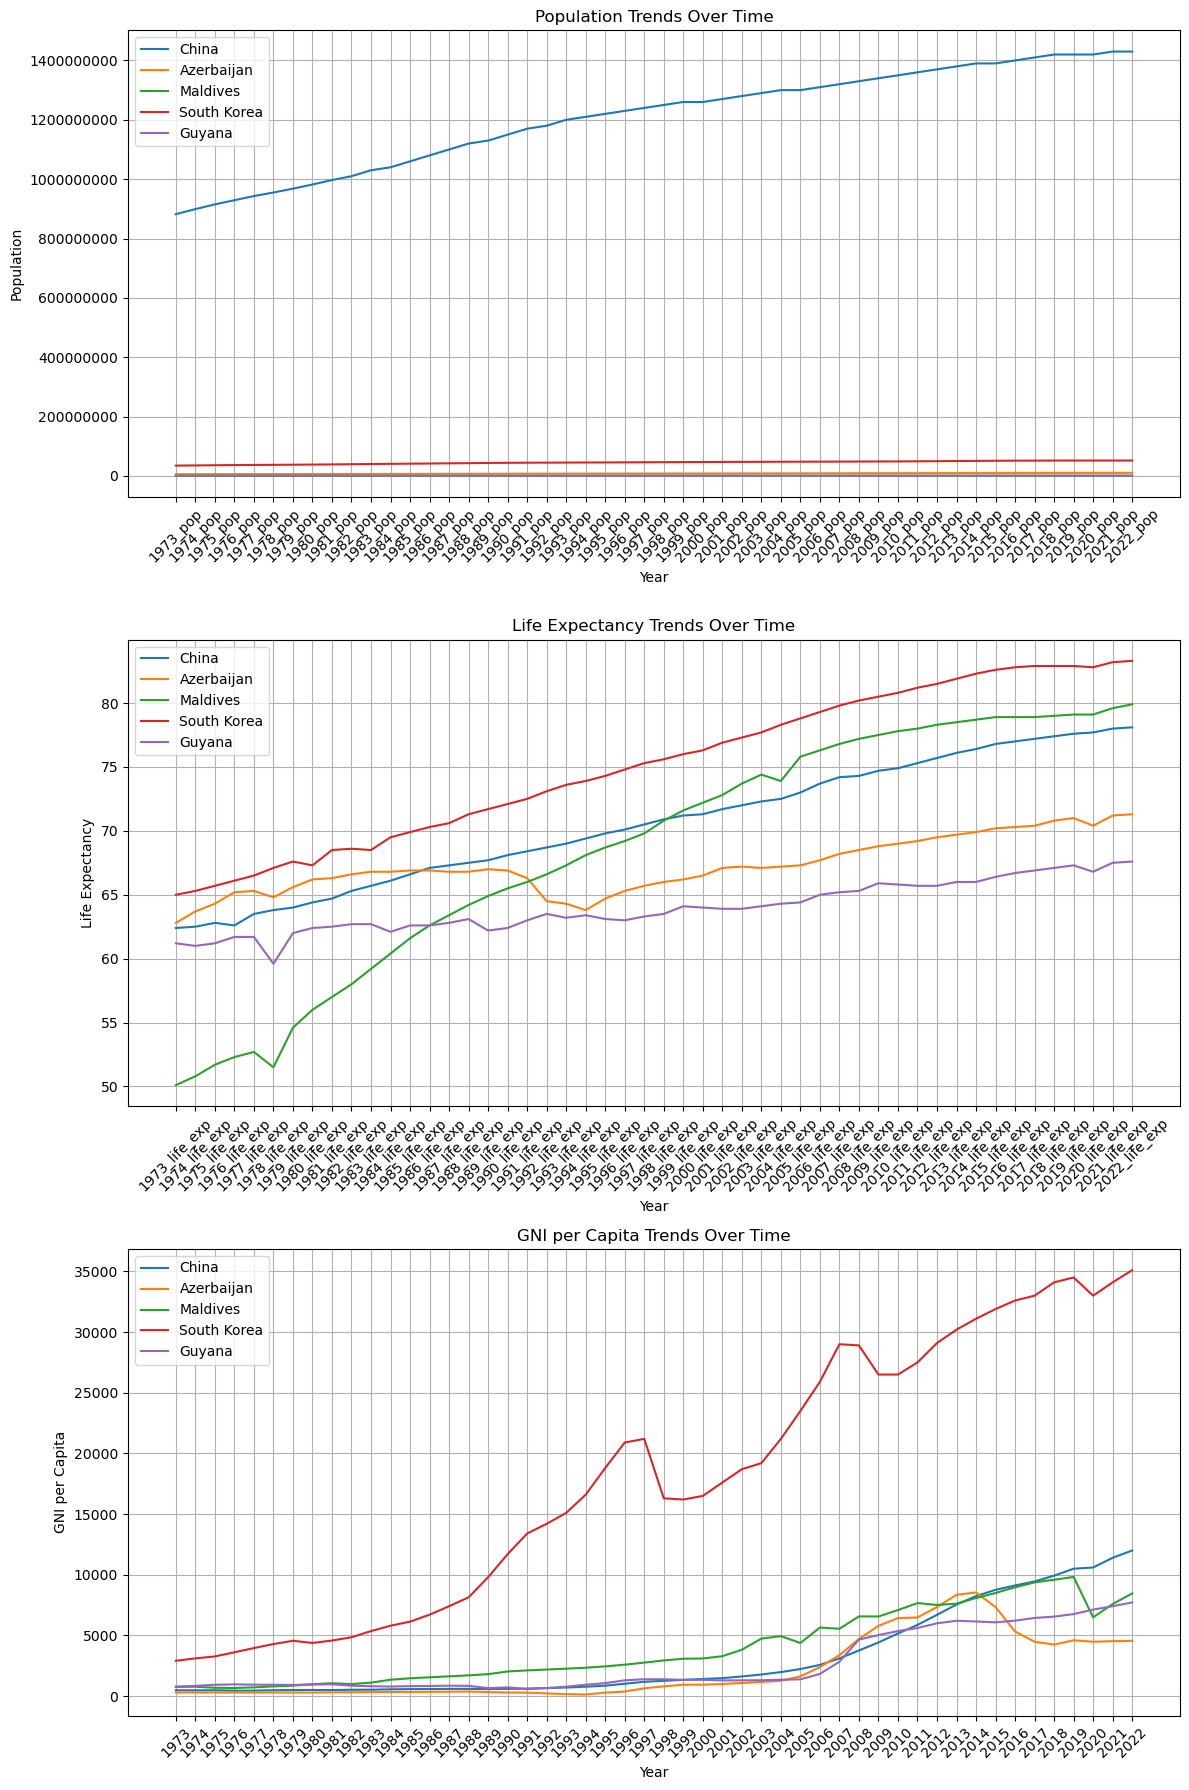

In [52]:
random_countries = ['China', 'Azerbaijan', 'Maldives', 'South Korea', 'Guyana']

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot Population Trends
axs[0].set_title('Population Trends Over Time')
for country in random_countries:
    axs[0].plot(merged_df.columns[74:124], merged_df[merged_df['country'] == country].iloc[:, 74:124].values.flatten(), label=country)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Population')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks
axs[0].ticklabel_format(style='plain', axis='y')
axs[0].legend()
axs[0].grid(True)

# Plot Life Expectancy Trends
axs[1].set_title('Life Expectancy Trends Over Time')
for country in random_countries:
    axs[1].plot(merged_df.columns[198:248], merged_df[merged_df['country'] == country].iloc[:, 198:248].values.flatten(), label=country)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Life Expectancy')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks
axs[1].legend()
axs[1].grid(True)

# Plot GNI per Capita Trends
axs[2].set_title('GNI per Capita Trends Over Time')
for country in random_countries:
    axs[2].plot(merged_df.columns[322:372], merged_df[merged_df['country'] == country].iloc[:, 322:372].values.flatten(), label=country)
axs[2].set_xlabel('Year')
axs[2].set_ylabel('GNI per Capita')
axs[2].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.savefig('combined_plot.png')
plt.show()

#### Which states have the top highest and lowest Population per growth rate over the last 50 years from 1973 to 2023

In [53]:
population_initial = merged_df['1973_pop']
population_final = merged_df['2023_pop']

population_growth = ((population_final - population_initial) / population_initial) * 100
population_growth_data = pd.DataFrame({'Country': merged_df['country'], 'Population Grow Rate (%)': round(population_growth, 3)})

highest_growth_pop = population_growth_data.nlargest(5, 'Population Grow Rate (%)')
lowest_growth_pop = population_growth_data.nsmallest(5, 'Population Grow Rate (%)')

print("Countries with the highest Population Grow Rate:")
print(highest_growth_pop)

print("\nCountries with the lowest Population Grow Rate:")
print(lowest_growth_pop)

Countries with the highest Population Grow Rate:
                  Country  Population Grow Rate (%)
3    United Arab Emirates                  2053.846
137                 Qatar                  1558.537
44               Djibouti                   544.068
84                 Jordan                   538.418
127                  Oman                   536.488

Countries with the lowest Population Grow Rate:
                    Country  Population Grow Rate (%)
102                  Latvia                   -25.610
171                 Ukraine                   -24.017
60                  Georgia                   -23.878
15                 Bulgaria                   -23.543
18   Bosnia and Herzegovina                   -18.528


#### Which states have the top highest and lowest Life Expectancy per growth rate over the last 50 years from 1973 to 2023

In [54]:
life_exp_initial = merged_df['1973_life_exp']
life_exp_final = merged_df['2023_life_exp']

life_exp_growth = ((life_exp_final - life_exp_initial) / life_exp_initial) * 100
life_exp_growth_data = pd.DataFrame({'Country': merged_df['country'], 'Life Expectancy Grow Rate (%)': round(life_exp_growth, 3)})

highest_growth_life_exp = life_exp_growth_data.nlargest(5, 'Life Expectancy Grow Rate (%)')
lowest_growth_life_exp = life_exp_growth_data.nsmallest(5, 'Life Expectancy Grow Rate (%)')

print("Countries with the highest Life Expectancy Grow Rate:")
print(highest_growth_life_exp)

print("\nCountries with the lowest Life Expectancy Grow Rate:")
print(lowest_growth_life_exp)

Countries with the highest Life Expectancy Grow Rate:
       Country  Life Expectancy Grow Rate (%)
136  Palestine                        100.798
53    Ethiopia                         71.463
93         Lao                         61.149
106   Maldives                         60.080
89    Cambodia                         57.333

Countries with the lowest Life Expectancy Grow Rate:
        Country  Life Expectancy Grow Rate (%)
99      Lesotho                         -3.791
19      Belarus                          3.043
15     Bulgaria                          3.217
112  Montenegro                          3.804
171     Ukraine                          4.641


## Visualize the Data

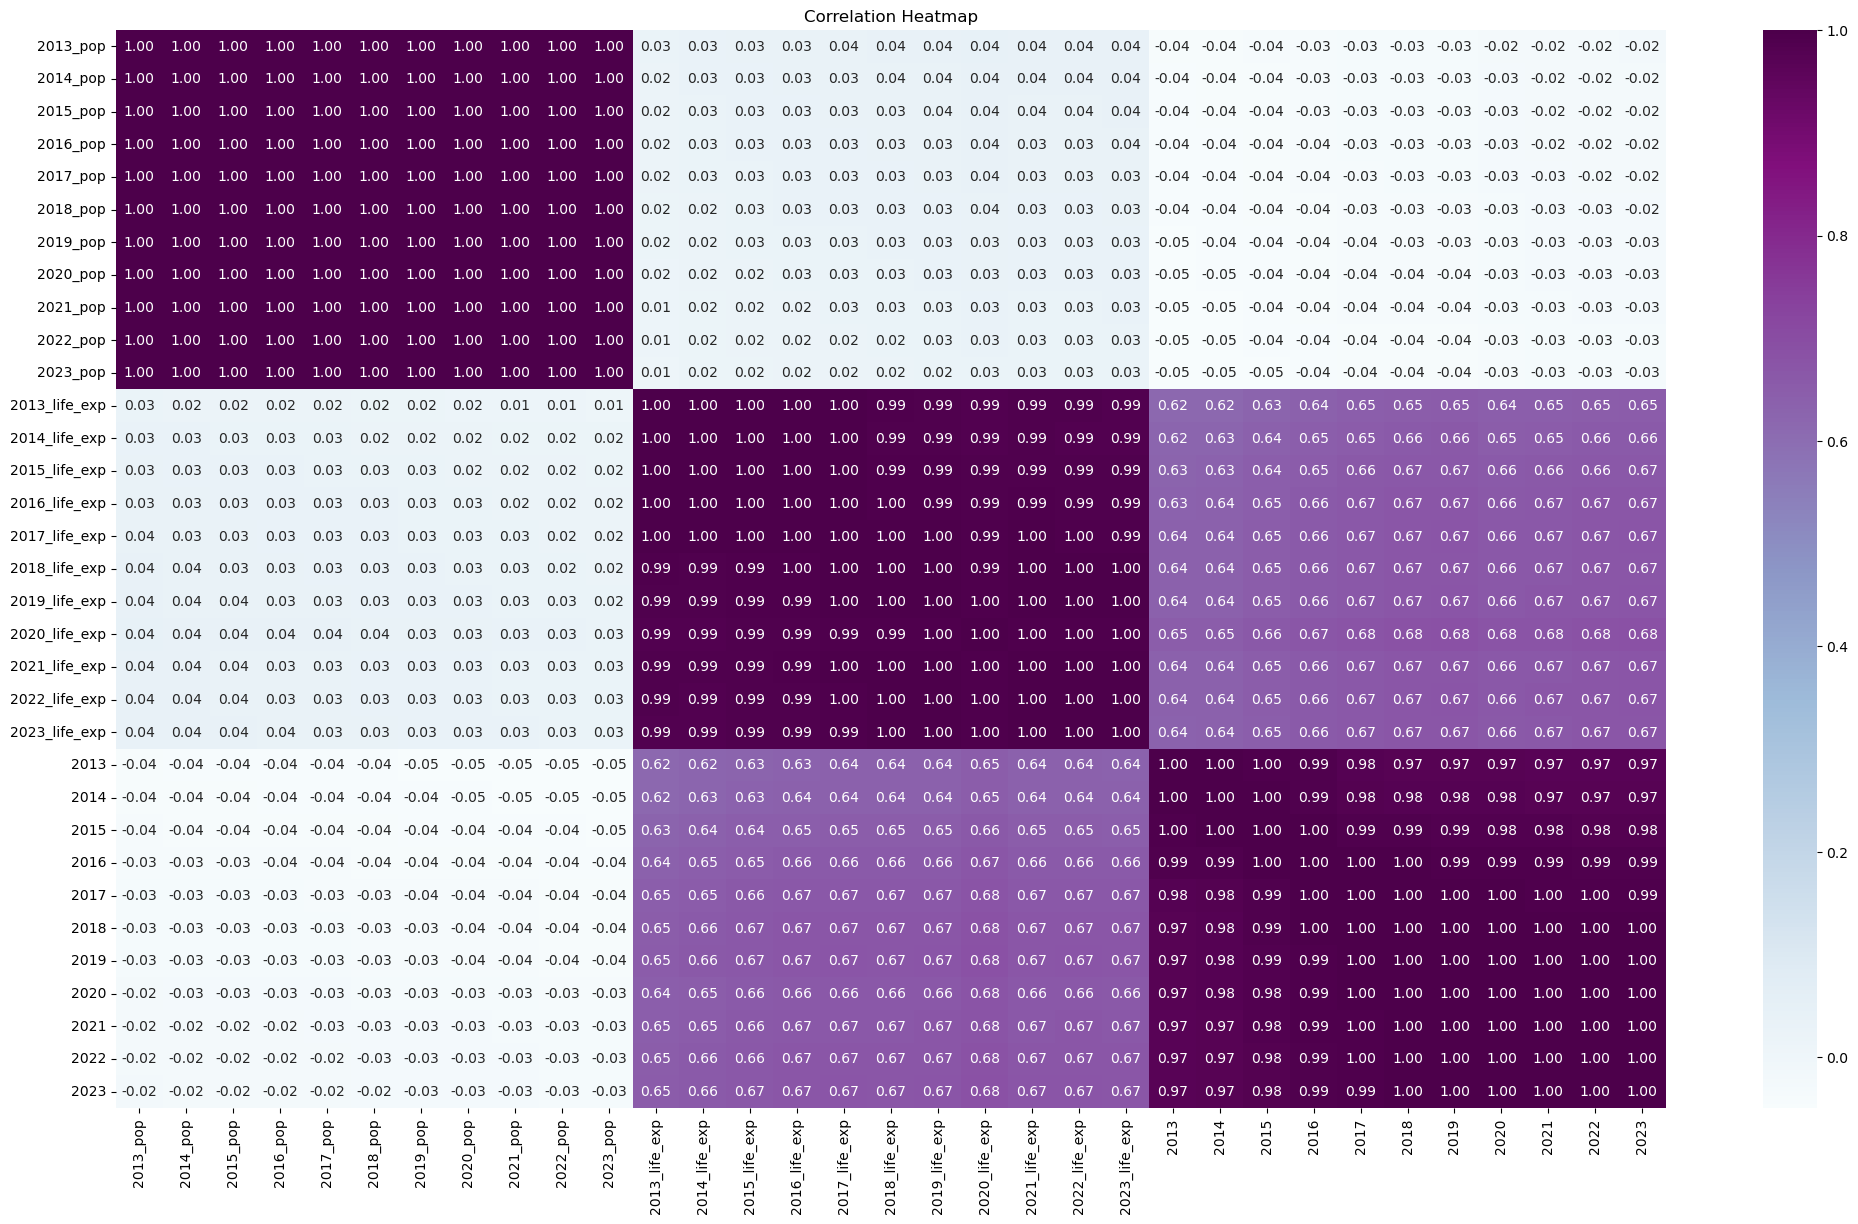

In [55]:
# Correlations and Heatmaps
import seaborn as sns

# Features to include in the heatmap
population_columns = merged_df.columns[114:125] # population columns from 2013 to 2023
life_expectancy_columns = merged_df.columns[238:249] # life expectancy columns from 2013 to 2023
gni_per_capita_columns = merged_df.columns[362:373] # gni per capita columns from 2013 to 2023

# The following will extract the dataframes for each feature
population_df = merged_df[population_columns]
life_expectancy_df = merged_df[life_expectancy_columns]
gni_per_capita_df = merged_df[gni_per_capita_columns]

# Concatenate the DF along the columns axis
new_merged_df = pd.concat([population_df, life_expectancy_df, gni_per_capita_df], axis=1)

# Correlation matrix
merged_df_corr = new_merged_df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(25, 14)) 
sns.heatmap(merged_df_corr, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Between 2013 and 2023:**
* There is a strong positive correlation between life expectancy and gross national income (GNI) per capita. This means when GNI increases, life expectancy tends to increase as well. When the country's average income increase, people in that country tend to live longer on average
* There is a weak positive correlation between life expectancy and population size. When life expectancy increases, population size tends to slightly increase.
* There is a weak positive correlation between the GNI per capita and population size. This implies that when the average income per person is higher in a country, the population tends to be slighty larger.

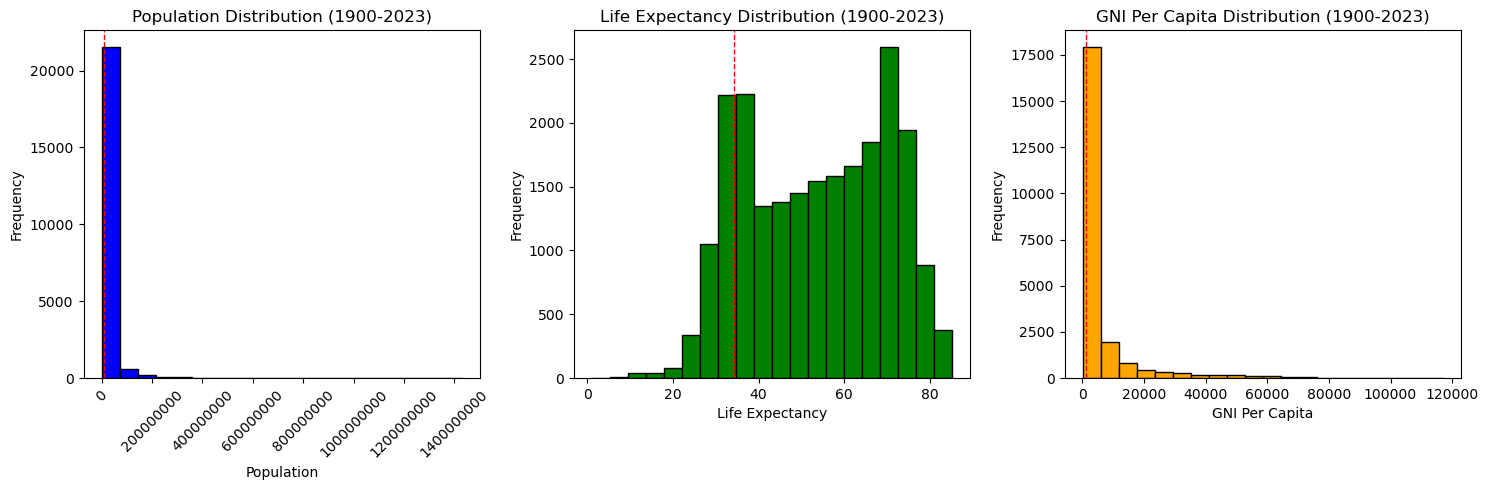

In [56]:
# Visualize distributions using histograms
plt.figure(figsize=(15, 5))
# Histogram for population
plt.subplot(1, 3, 1)
population_mean = merged_df.iloc[:, 1:124].mean().values[0]
plt.hist(merged_df.iloc[:, 1:124].values.flatten(), bins=20, color='blue', edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('Population Distribution (1900-2023)')
plt.xlabel('Population')
plt.ticklabel_format(style='plain', axis='x') # update format of y-axis from scientific to plain
plt.xticks(rotation=45)
plt.ylabel('Frequency')

# Histogram for life expectancy
plt.subplot(1, 3, 2)
life_expectancy_mean = merged_df.iloc[:, 125:248].mean().values[0]
plt.hist(merged_df.iloc[:, 125:248].values.flatten(), bins=20, color='green', edgecolor='black')
plt.axvline(life_expectancy_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('Life Expectancy Distribution (1900-2023)')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

# Histogram for GNI per capita
plt.subplot(1, 3, 3)
gni_per_capita_mean = merged_df.iloc[:, 249:372].mean().values[0]
plt.hist(merged_df.iloc[:, 249:372].values.flatten(), bins=20, color='orange', edgecolor='black')
plt.axvline(gni_per_capita_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('GNI Per Capita Distribution (1900-2023)')
plt.xlabel('GNI Per Capita')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


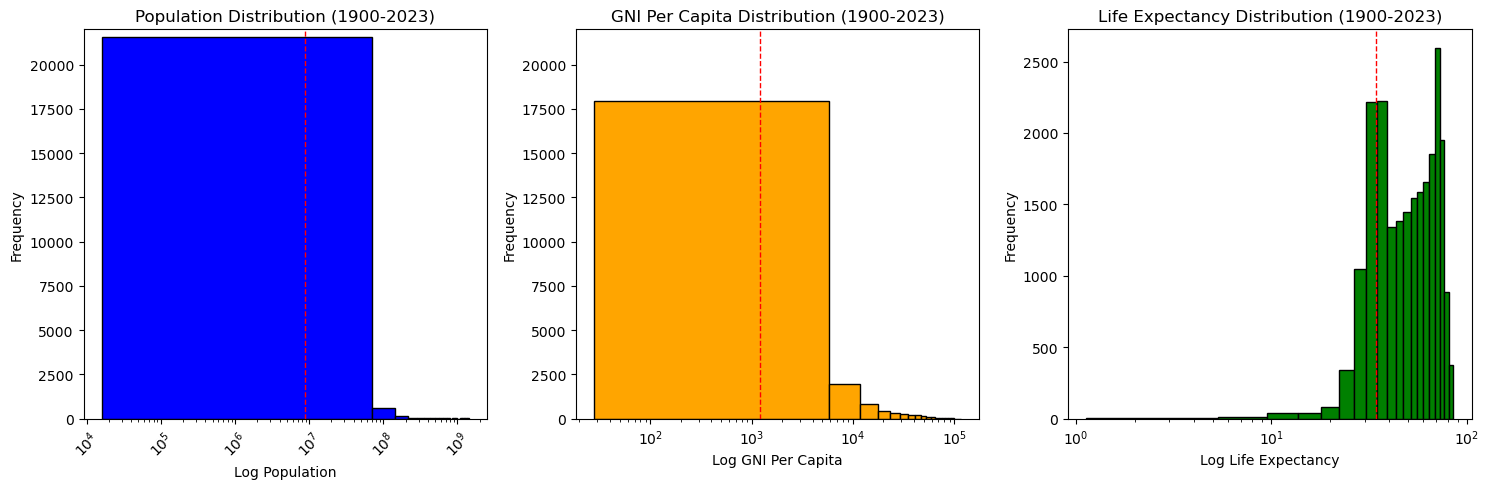

In [57]:
plt.figure(figsize=(15, 5))
# Histogram for population
plt.subplot(1, 3, 1)
population_mean = merged_df.iloc[:, 1:124].mean().values[0]
plt.hist(merged_df.iloc[:, 1:124].values.flatten(), bins=20, color='blue', edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('Population Distribution (1900-2023)')
plt.xlabel('Log Population')
plt.xscale('log') # Added logarithmic scale as suggested in the feedback after presentation to better visualize data with a wide range of values
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.ylim([0, 22000])



# Histogram for GNI per capita
plt.subplot(1, 3, 2)
gni_per_capita_mean = merged_df.iloc[:, 249:372].mean().values[0]
plt.hist(merged_df.iloc[:, 249:372].values.flatten(), bins=20, color='orange', edgecolor='black')
plt.axvline(gni_per_capita_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('GNI Per Capita Distribution (1900-2023)')
plt.xlabel('Log GNI Per Capita')
plt.xscale('log')  # logarithmic scale
plt.ylabel('Frequency')
plt.ylim([0, 22000])

# Histogram for life expectancy
plt.subplot(1, 3, 3)
life_expectancy_mean = merged_df.iloc[:, 125:248].mean().values[0]
plt.hist(merged_df.iloc[:, 125:248].values.flatten(), bins=20, color='green', edgecolor='black')
plt.axvline(life_expectancy_mean, color='red', linestyle='dashed', linewidth=1)
plt.title('Life Expectancy Distribution (1900-2023)')
plt.xlabel('Log Life Expectancy')
plt.xscale('log')  # logarithmic scale 
plt.ylabel('Frequency') # Didn't set ylim for Life expectancy because it shrinks its graph


plt.tight_layout()
plt.show()

The histograms above is about the distribution of population, life expectancy, and GNI per capita between 1900 and 2023.

**Population Distribution:** 
* The mean population is ~ 8.8 million people.
* The distribution is highly skewed to the right. This means that most countries have relatively smaller populations, while a few countries have very larger populations.

**Life Expectancy Distribution:** 
* The mean life expectancy is ~ 34.3 years.
* The Life Expectancy Distribution shows that life expectancy varies across countries and is more  evenly spread out but it does not follow a normal distribution pattern.

**GNI Per Capita Distribution:**
* The mean of GNI per capita is ~ $1207.42.
* Similar to population, the distribution of GNI per capita is right-skewed, which means that the majority of countries have lower GNI per capita values, while a few countries have higher values.

These histograms provide snapshots the spread and central tendencies of population, life expectancy, and GNI per capita of countries in the dataset. They also illustrate the skewed nature of the distributions, which means that there are outliers.

In [58]:
print("Population mean:", population_mean)
print("Life expectancy mean:", life_expectancy_mean)
print("GNI per capita", gni_per_capita_mean)

Population mean: 8793348.369565217
Life expectancy mean: 34.28532608695652
GNI per capita 1207.4184782608695


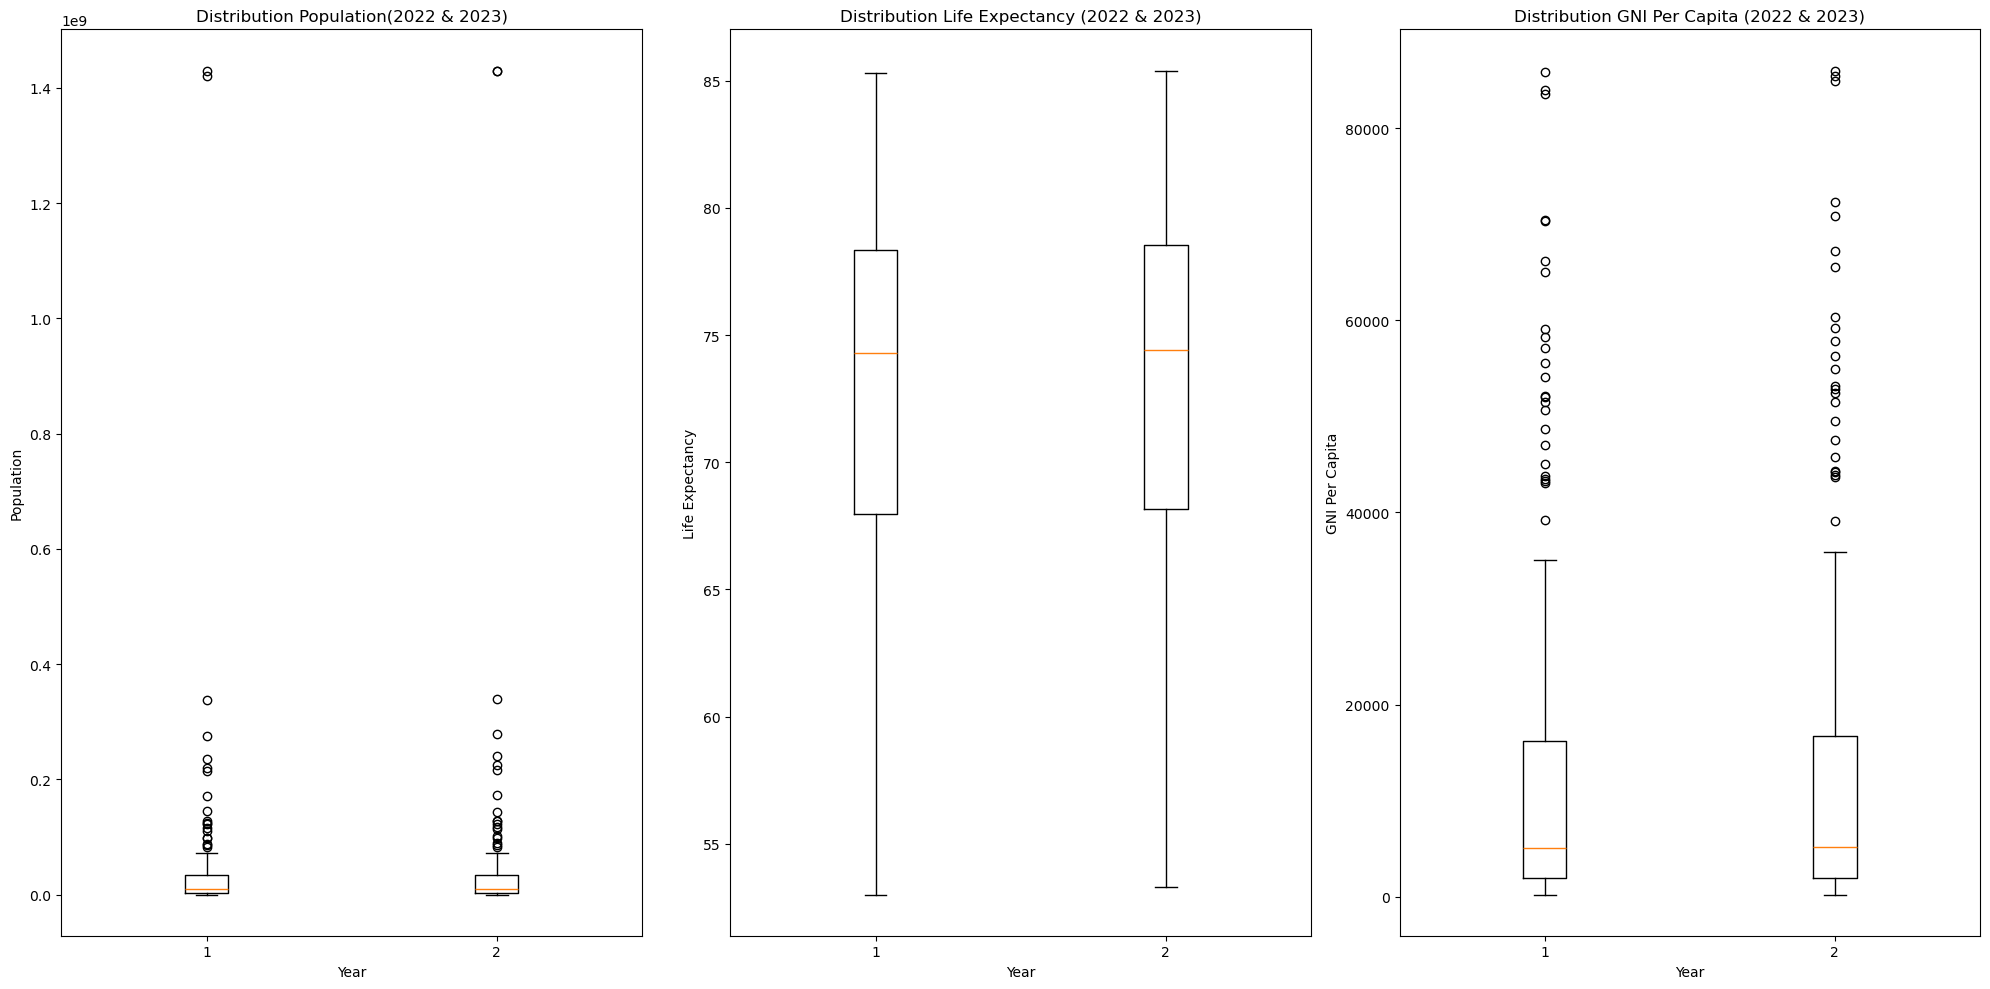

In [59]:
# Plot and interpret boxplots
plt.figure(figsize=(20, 10))

# Boxplot for population
plt.subplot(1, 3, 1)
plt.boxplot(merged_df.iloc[:, 123:125].values)
plt.title('Distribution Population(2022 & 2023)')
plt.xlabel('Year')
plt.ylabel('Population')

# Boxplot for life expectancy
plt.subplot(1, 3, 2)
plt.boxplot(merged_df.iloc[:, 247:249].values)
plt.title('Distribution Life Expectancy (2022 & 2023)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

# Boxplot for GNI per capita
plt.subplot(1, 3, 3)
plt.boxplot(merged_df.iloc[:, 371:373].values)
plt.title('Distribution GNI Per Capita (2022 & 2023)')
plt.xlabel('Year')
plt.ylabel('GNI Per Capita')

plt.tight_layout()
plt.show()

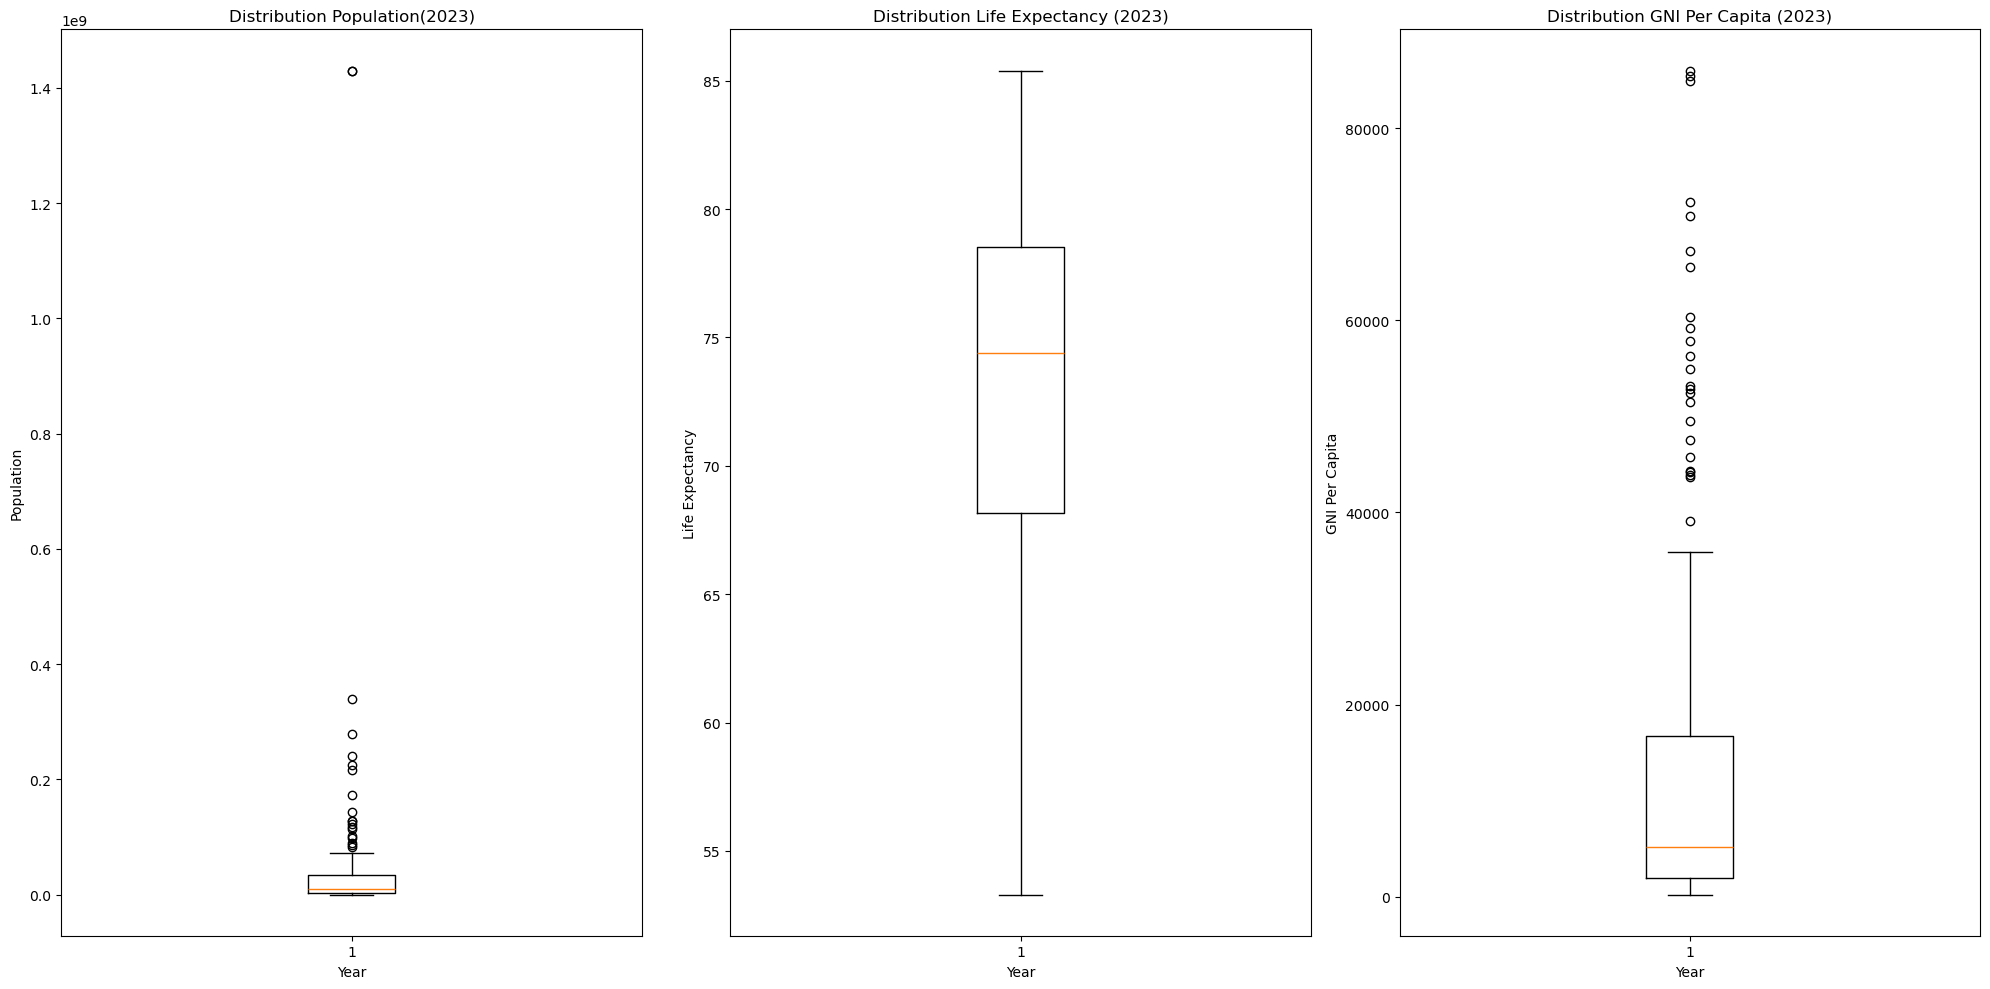

In [60]:
# Plot and interpret boxplots
plt.figure(figsize=(20, 10))

# Boxplot for population
plt.subplot(1, 3, 1)
plt.boxplot(merged_df.iloc[:, 124:125].values)
plt.title('Distribution Population(2023)')
plt.xlabel('Year')
plt.ylabel('Population')

# Boxplot for life expectancy
plt.subplot(1, 3, 2)
plt.boxplot(merged_df.iloc[:, 248:249].values)
plt.title('Distribution Life Expectancy (2023)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

# Boxplot for GNI per capita
plt.subplot(1, 3, 3)
plt.boxplot(merged_df.iloc[:, 372:373].values)
plt.title('Distribution GNI Per Capita (2023)')
plt.xlabel('Year')
plt.ylabel('GNI Per Capita')

plt.tight_layout()
plt.savefig('boxplot_distribution.png')
plt.show()

In [61]:
merged_df.iloc[:, 123:125].describe()

2022_pop      2023_pop
count  1.840000e+02  1.840000e+02
mean   4.305664e+07  4.341459e+07
std    1.534264e+08  1.540395e+08
min    9.380000e+04  9.430000e+04
25%    2.740000e+06  2.757500e+06
50%    9.960000e+06  1.015000e+07
75%    3.355000e+07  3.415000e+07
max    1.430000e+09  1.430000e+09

In [62]:
merged_df.iloc[:, 247:249].describe()

2022_life_exp  2023_life_exp
count     184.000000     184.000000
mean       73.421739      73.603804
std         6.869992       6.834151
min        53.000000      53.300000
25%        67.950000      68.175000
50%        74.300000      74.400000
75%        78.350000      78.525000
max        85.300000      85.400000

In [63]:
merged_df.iloc[:, 371:373].describe()

2022          2023
count    184.000000    184.000000
mean   13812.722826  14090.706522
std    19039.322006  19310.695969
min      231.000000    233.000000
25%     1967.500000   1975.000000
50%     5070.000000   5155.000000
75%    16200.000000  16775.000000
max    85800.000000  86000.000000

In [64]:
# Re-ran the following code just for reference based on the next summary
# Sorting by population in 2023
top_pop_2023 = merged_df.sort_values(by='2023_pop', ascending=False).head()
print("Top population in 2023")
print(top_pop_2023[['country', '2023_pop']]), print("")

# Sorting by GNI per capita in 2023
top_gni_2023 = merged_df.sort_values(by='2023', ascending=False).head()
print("Top GNI per capita in 2023:")
print(top_gni_2023[['country', '2023']]), print("")

# Sorting by Life expectancy in 2023
top_lifeExp_2023 = merged_df.sort_values(by='2023_life_exp', ascending=False).head()
print("Top Life expectancy in 2023")
print(top_lifeExp_2023[['country', '2023']])

Top population in 2023
           country      2023_pop
76           India  1.430000e+09
31           China  1.430000e+09
173  United States  3.400000e+08
75       Indonesia  2.780000e+08
128       Pakistan  2.400000e+08

Top GNI per capita in 2023:
           country     2023
29     Switzerland  86000.0
124         Norway  85400.0
101     Luxembourg  84900.0
77         Ireland  72300.0
173  United States  70900.0

Top Life expectancy in 2023
              country     2023
144         Singapore  59200.0
85              Japan  43700.0
70   Hong Kong, China  53200.0
80            Iceland  65500.0
29        Switzerland  86000.0


In [65]:
# Re-ran the following code just for reference based on the next summary
# Sorting by population in 2022
top_pop_2022 = merged_df.sort_values(by='2022_pop', ascending=False).head()
print("Top population in 2023")
print(top_pop_2022[['country', '2022_pop']]), print("")

# Sorting by GNI per capita in 2022
top_gni_2022 = merged_df.sort_values(by='2022', ascending=False).head()
print("Top GNI per capita in 2022:")
print(top_gni_2022[['country', '2022']]), print("")

# Sorting by Life expectancy in 2022
top_lifeExp_2022 = merged_df.sort_values(by='2022_life_exp', ascending=False).head()
print("Top Life expectancy in 2022")
print(top_lifeExp_2022[['country', '2022']])

Top population in 2023
           country      2022_pop
31           China  1.430000e+09
76           India  1.420000e+09
173  United States  3.380000e+08
75       Indonesia  2.760000e+08
128       Pakistan  2.360000e+08

Top GNI per capita in 2022:
           country     2022
29     Switzerland  85800.0
101     Luxembourg  84000.0
124         Norway  83600.0
77         Ireland  70400.0
173  United States  70300.0

Top Life expectancy in 2022
              country     2022
144         Singapore  58300.0
85              Japan  43100.0
70   Hong Kong, China  52000.0
80            Iceland  65000.0
29        Switzerland  85800.0


**For "2022_pop":**

* Q1 (25th percentile): 25% of the data falls below 2.74 million people
* Q2 (median, 50th percentile): 50% of the data falls below 9.96 million people
* Q3 (75th percentile): 75% of the data falls below 33.55 million people

For "2023_pop":

* Q1 (25th percentile): 25% of the data falls below2.76 million people
* Q2 (median, 50th percentile): 50% of the data falls below 10.15 million people
* Q3 (75th percentile): 75% of the data falls below 34.15 million people

`In 2022 and 2023, half of the countries had populations below 9.96 million and 10.15 million respectively. 
This shows that populations vary widely across different places. Some countries have very small populations, while others have much larger ones. There are outliers in the population mostly influence by China and India having each a population of ~ 1.43 billions, follow by the USA with ~ 338 millions`

----------
**For "2022_life_exp":**

    Q2 (median, 50th percentile): 50% of the data falls below 74.3 years.
    Q3 (75th percentile): 75% of the data falls below 78.35 years.

**For "2023_life_exp":**

    Q1 (25th percentile): 25% of the data falls below 68.175 years.
    Q2 (median, 50th percentile): 50% of the data falls below 74.4 years.
    Q3 (75th percentile): 75% of the data falls below 78.525 years.


`In 2022 and 2023, half of the population had a life expectancy below 74.3 and 74.4 years respectively. 
The median life expectancy slightly increased from 2022 to 2023, indicating a potential positive trend in life expectancy over time.`

------------
**For GNI per capita:**

    For 2022:
        Q1 (25th percentile): 25% of the data falls below $1,967.50.
        Q2 (median, 50th percentile): 50% of the data falls below $5,070.
        Q3 (75th percentile): 75% of the data falls below $16,200.
 
    For 2023:
        Q1 (25th percentile): 25% of the data falls below $1,975.
        Q2 (median, 50th percentile): 50% of the data falls below $5,155.
        Q3 (75th percentile): 75% of the data falls below $16,775.

`In 2022 and 2023, half of the population had a GNI per capita below $5,070 and $5,155 respectively. 
There is an increase in the median GNI per capita from 2022 to 2023; this indicates a potential positive trend in economic prosperity over time. In 2022 and 2023 outliers in the GNI per capita are influenced by Switzerland, Norway, and Luxembourg, which had the highest income per person, with Switzerland being the highest at $86,000, followed by Norway at $85,400, and Luxembourg at $84,900. The United States also had a high income per person at $70,900 but was lower compared to the top three countries.`

In [66]:
# Sorting by population in 2023
lowest_pop_2023 = merged_df.sort_values(by='2023_pop', ascending=True).head()
print("lowest population in 2023")
print(lowest_pop_2023[['country', '2023_pop']]), print("")

# Sorting by GNI per capita in 2023
lowest_gni_2023 = merged_df.sort_values(by='2023', ascending=True).head()
print("lowest GNI per capita in 2023:")
print(lowest_gni_2023[['country', '2023']]), print("")

# Sorting by Life expectancy in 2023
lowest_lifeExp_2023 = merged_df.sort_values(by='2023_life_exp', ascending=True).head()
print("lowest Life expectancy in 2023")
print(lowest_lifeExp_2023[['country', '2023']])


lowest population in 2023
                            country  2023_pop
6               Antigua and Barbuda   94300.0
175  St. Vincent and the Grenadines  104000.0
157                      Seychelles  108000.0
165                           Tonga  108000.0
57            Micronesia, Fed. Sts.  115000.0

lowest GNI per capita in 2023:
        country   2023
10      Burundi  233.0
148     Somalia  322.0
50      Eritrea  484.0
114  Mozambique  494.0
105  Madagascar  498.0

lowest Life expectancy in 2023
                      country    2023
99                    Lesotho  1190.0
27   Central African Republic   538.0
156                  Eswatini  3420.0
148                   Somalia   322.0
145           Solomon Islands  2380.0


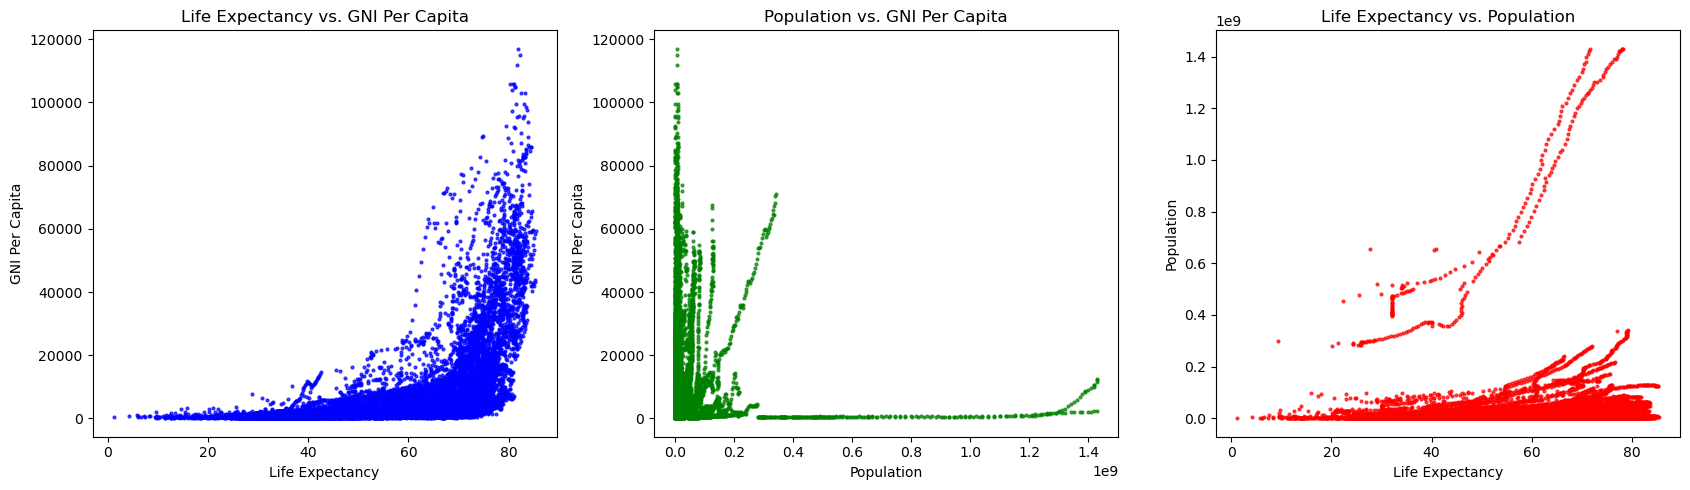

In [67]:
# Plot and interpret scatter plots
plt.figure(figsize=(17, 5))

# Scatter plot for life expectancy vs. GNI per capita
plt.subplot(1, 3, 1)
plt.scatter(merged_df.iloc[:, 125:249].values.flatten(), merged_df.iloc[:, 249:373].values.flatten(), color='blue', alpha=0.7, s=4)
plt.title('Life Expectancy vs. GNI Per Capita')
plt.xlabel('Life Expectancy')
plt.ylabel('GNI Per Capita')

# Scatter plot for population vs. GNI per capita
plt.subplot(1, 3, 2)
plt.scatter(merged_df.iloc[:, 1:125].values.flatten(), merged_df.iloc[:, 249:373].values.flatten(), color='green', alpha=0.7, s=4)
plt.title('Population vs. GNI Per Capita')
plt.xlabel('Population')
plt.ylabel('GNI Per Capita')

# Scatter plot for life expectancy vs. population
plt.subplot(1, 3, 3)
plt.scatter(merged_df.iloc[:, 125:249].values.flatten(), merged_df.iloc[:, 1:125].values.flatten(), color='red', alpha=0.7, s=4)
plt.title('Life Expectancy vs. Population')
plt.xlabel('Life Expectancy')
plt.ylabel('Population')

plt.tight_layout()
plt.show()

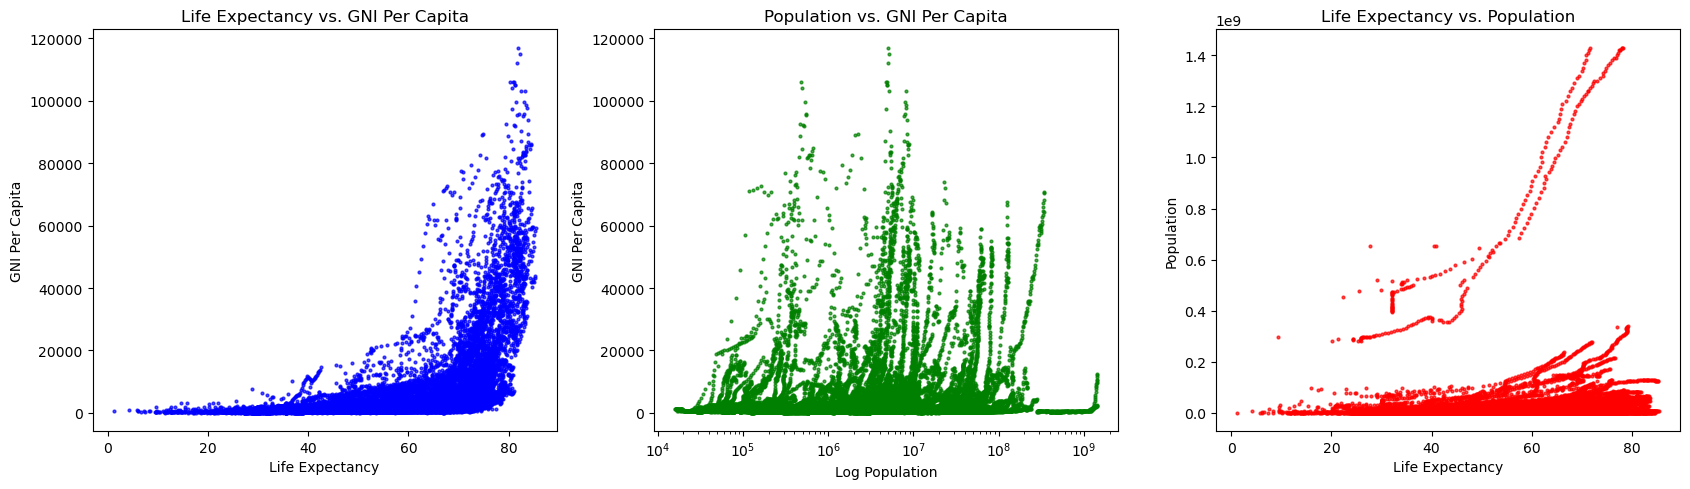

In [68]:
# Plot and interpret scatter plots
plt.figure(figsize=(17, 5))

# Scatter plot for life expectancy vs. GNI per capita
plt.subplot(1, 3, 1)
plt.scatter(merged_df.iloc[:, 125:249].values.flatten(), merged_df.iloc[:, 249:373].values.flatten(), color='blue', alpha=0.7, s=4)
plt.title('Life Expectancy vs. GNI Per Capita')
plt.xlabel('Life Expectancy')
plt.ylabel('GNI Per Capita')

# Scatter plot for population vs. GNI per capita
plt.subplot(1, 3, 2)
plt.scatter(merged_df.iloc[:, 1:125].values.flatten(), merged_df.iloc[:, 249:373].values.flatten(), color='green', alpha=0.7, s=4)
plt.title('Population vs. GNI Per Capita')
plt.xlabel('Log Population')
plt.xscale('log')
plt.ylabel('GNI Per Capita')

# Scatter plot for life expectancy vs. population
plt.subplot(1, 3, 3)
plt.scatter(merged_df.iloc[:, 125:249].values.flatten(), merged_df.iloc[:, 1:125].values.flatten(), color='red', alpha=0.7, s=4)
plt.title('Life Expectancy vs. Population')
plt.xlabel('Life Expectancy')
plt.ylabel('Population')

plt.tight_layout()
plt.show()

* Life expectancy and GNI per Capita have a positive correlation, as they both increase and follow an increasing pattern. Countries with higher incomes tend to have longer life expectancies
* There is a weak positive correlation between population and GNI per capita. Countries with higher incomes may tend to have slightly larger populations.
* There is a weak positive correlation between life expectancy and population size, even though it's stronger than Population vs GNI per Capita. When life expectancy increases, population size tends to slightly increase, but there may be other factors other than population size may have a stronger influence on life expectancy.

## Conclusions and Recommendations

### Conclusions

* Countries with higher incomes tend to have longer life expectancies. This shows the importance of economic prosperity in improving health outcomes and life expectancy.

* Although there's a slight increase in population size when life expectancy improves, population size doesn't have a major influence on life expectancy. Other factors, such as healthcare, education, and lifestyle choices have an important role in life expectancy.

### Recommendations
* Governments should prioritize policies that promote economic growth and increase gross national income (GNI) per capita. This is because higher GNI per capita is strongly associated with longer life expectancy.
* Even though there's a weak positive correlation between population size and GNI per capita, governments should focus on improving the quality of life for their citizens while population size is increasing overtime.